<a href="https://colab.research.google.com/github/thepankaj018/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [108]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from scipy.stats import skew


In [109]:
pd.set_option('display.max_columns', None)

### Dataset Loading

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Load Dataset
file_path = "/content/drive/MyDrive/SeoulBikeData.csv"
df = pd.read_csv(file_path,encoding= 'unicode_escape')

### Dataset First View

In [112]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [113]:
# Dataset Rows & Columns count
print(f'number of rows in dataframe are {df.shape[0]}')
print(f'number of columns in dataframe are {df.shape[1]}')

number of rows in dataframe are 8760
number of columns in dataframe are 14


### Dataset Information

In [114]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [115]:
# Dataset Duplicate Value Count
print(f'number of duplicates values are {df.duplicated().sum()}')

number of duplicates values are 0


#### Missing Values/Null Values

In [116]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

####No Missing values are present in the dataframe. 

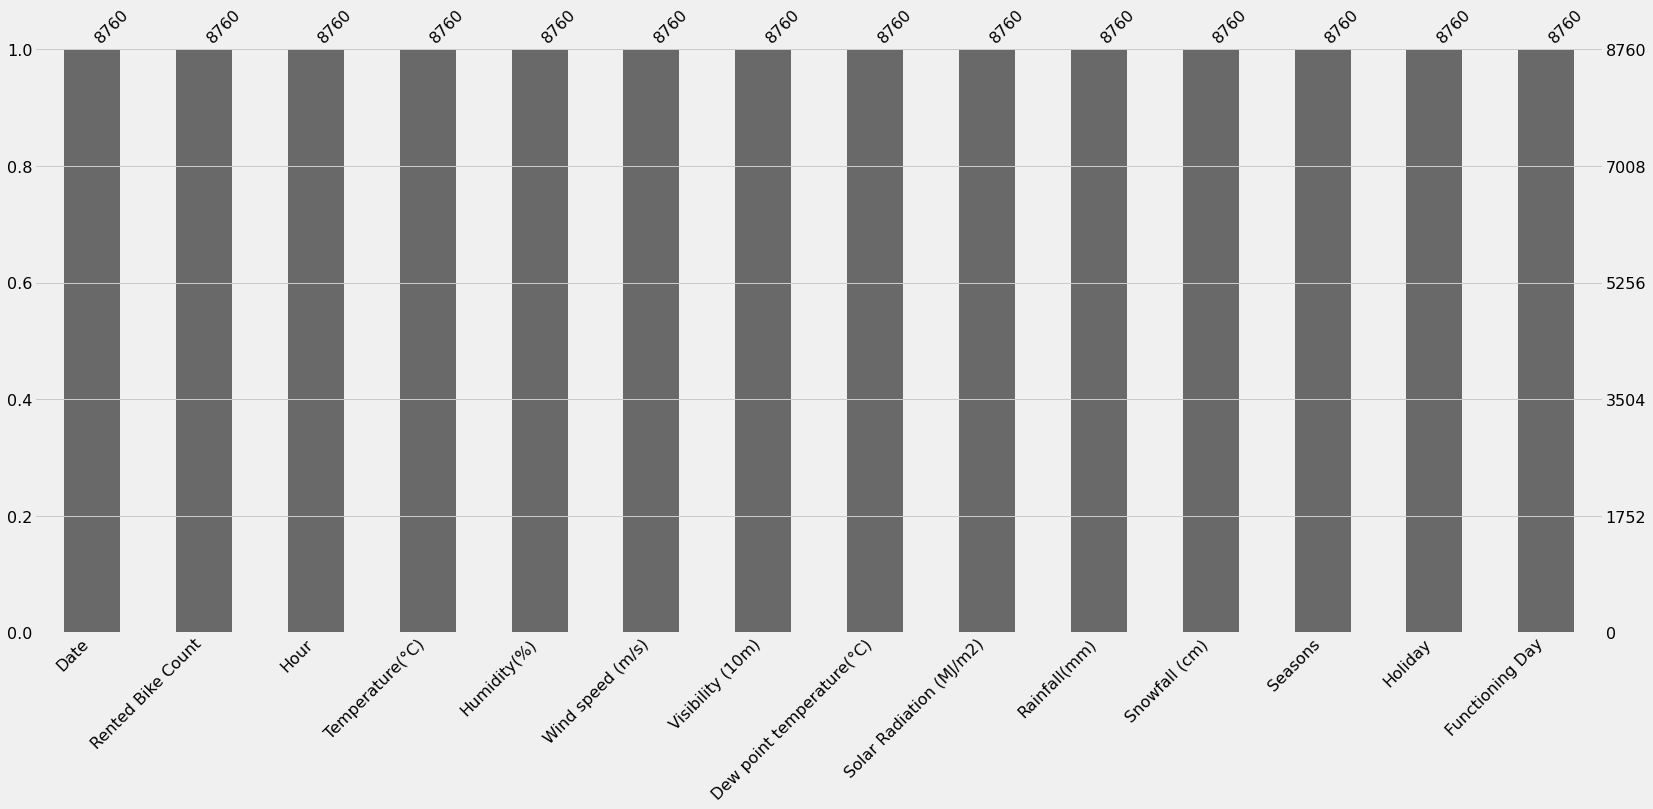

In [117]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

###ABOUT MISSINGNO LIBRARY - Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. 

### It is clearly seen from the above visualization that there is no missing value present in the datasets.

### What did you know about your dataset?

###1) There are 8760 rows and 14 columns present in dataset.
###2) Datatypes of variables present in datasets are integer,float and object.
###3) There is no duplicate entries in the dataset.
###4) There is no missing values present in the datasets.

## ***2. Understanding Your Variables***

In [118]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [119]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

### Variables Description 


*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [120]:
# Check Unique Values for each variable.
for elem in df.columns:
  print("-"*100)
  print(" ")
  print(f'Unique values present in {elem} are')
  print(" ")
  print(df[elem].unique())
  print(" ")
  print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in Date are
 
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [121]:
# Write your code to make your dataset analysis ready.

In [122]:
# Converting column Date into datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'])

In [123]:
# Separating Day,Month.Year from dataframe column.
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [124]:
# Dropping Date columns
df.drop("Date",axis = 1,inplace = True)

In [125]:
# Sorting columns by datatypes.
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)', 'Day', 'Month', 'Year'], float64: ['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], object: ['Seasons', 'Holiday', 'Functioning Day']}

In [126]:
# Separating Numerical and Categorical column
numerical_features = df.describe().columns.tolist()
categorical_features = list(set(df.columns.tolist()) - set(numerical_features))

In [127]:
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [128]:
categorical_features

['Seasons', 'Holiday', 'Functioning Day']

### What all manipulations have you done and insights you found?

####1)Converted column Date into datetime64[ns] format.
####2)Separated Day,Month.Year from dataframe columns.
####3)Dropped Date columns.
####4)Separated Numerical and Categorical columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

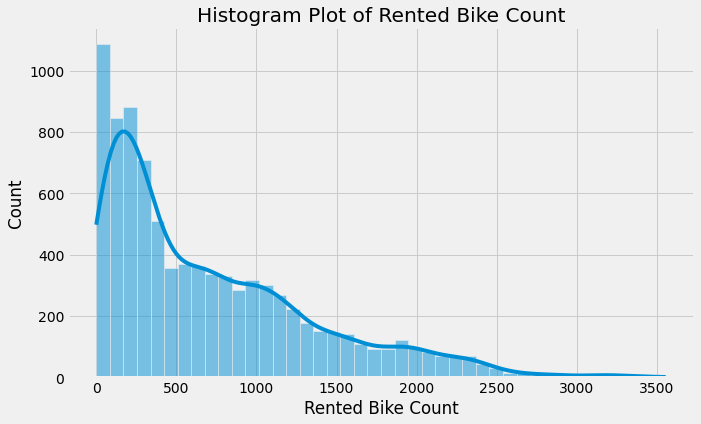

In [129]:
# Chart - 1 visualization 
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rented Bike Count',kde = True)
plt.title('Histogram Plot of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

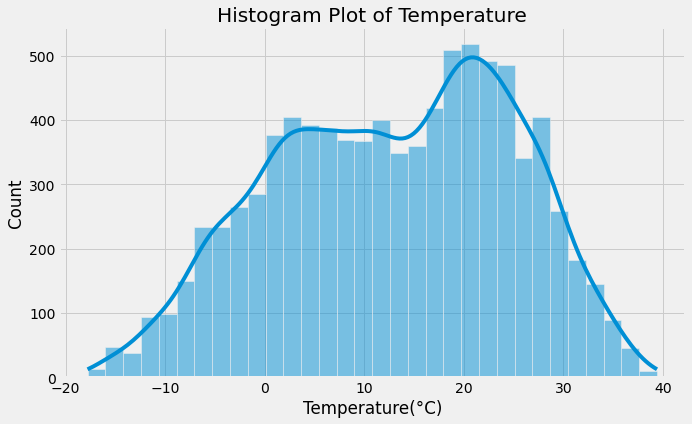

In [130]:
# Chart - 2 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Temperature(°C)',kde = True)
plt.title('Histogram Plot of Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

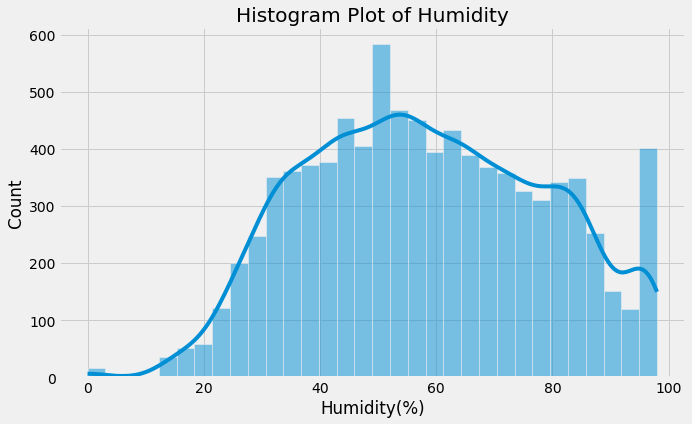

In [131]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Humidity(%)',kde = True)
plt.title('Histogram Plot of Humidity')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

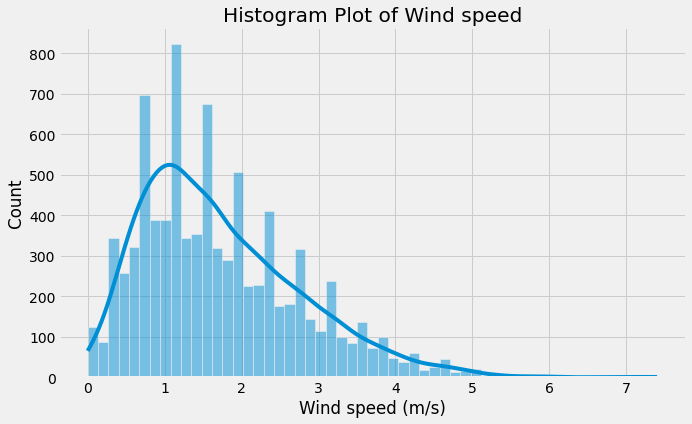

In [132]:
# Chart - 4 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Wind speed (m/s)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

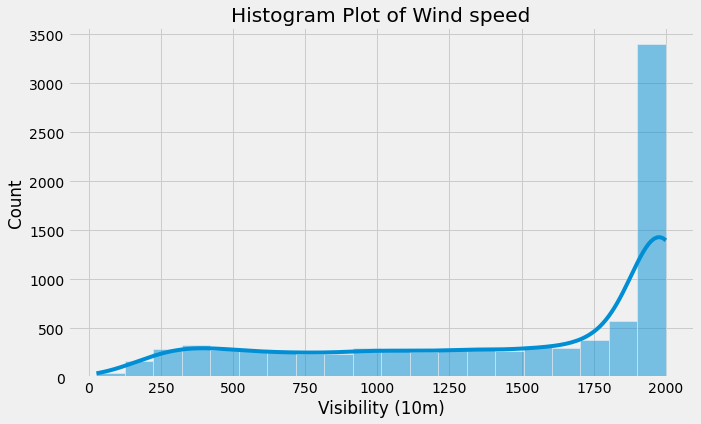

In [133]:
# Chart - 5 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Visibility (10m)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

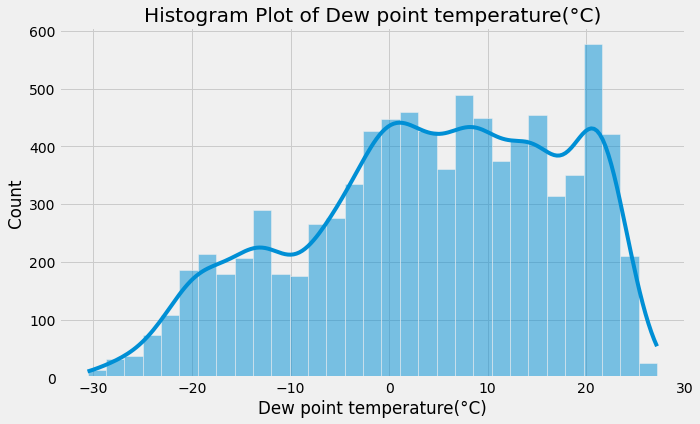

In [134]:
# Chart - 6 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Dew point temperature(°C)',kde = True)
plt.title('Histogram Plot of Dew point temperature(°C)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

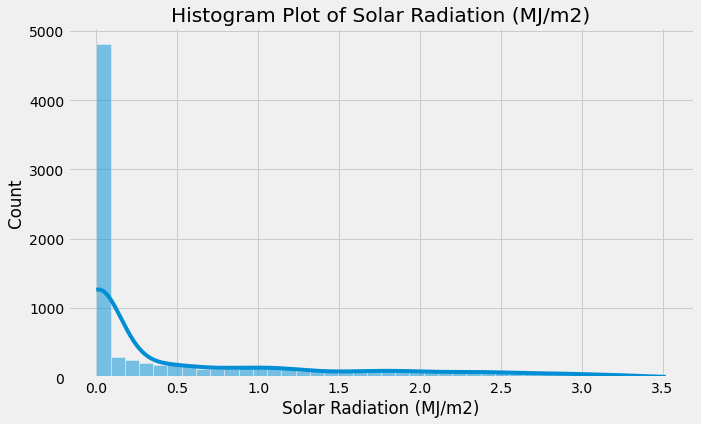

In [135]:
# Chart - 7 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Solar Radiation (MJ/m2)',kde = True)
plt.title('Histogram Plot of Solar Radiation (MJ/m2)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

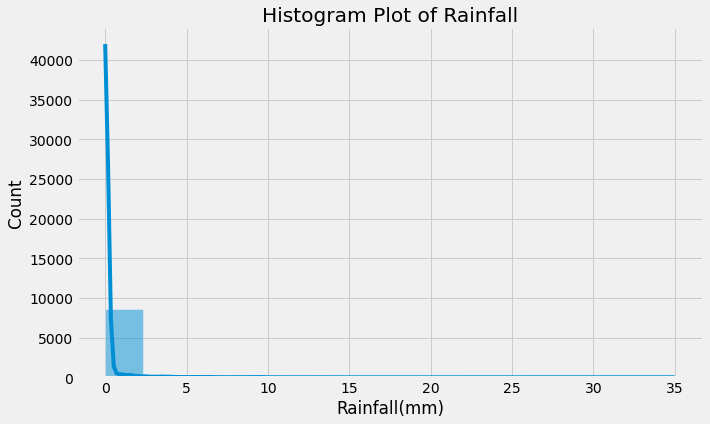

In [136]:
# Chart - 8 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rainfall(mm)',kde = True)
plt.title('Histogram Plot of Rainfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

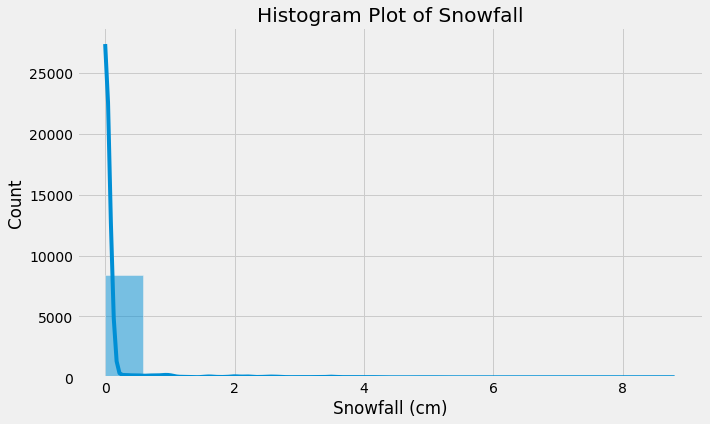

In [137]:
# Chart - 9 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Snowfall (cm)',kde = True)
plt.title('Histogram Plot of Snowfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

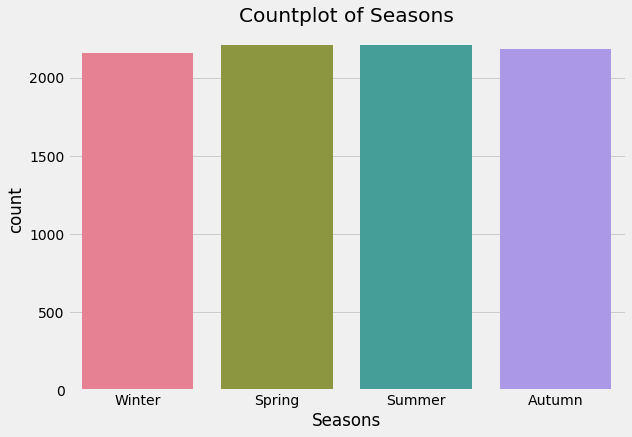

In [138]:
# Chart - 10 visualization code
sns.catplot(data = df,x = 'Seasons',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

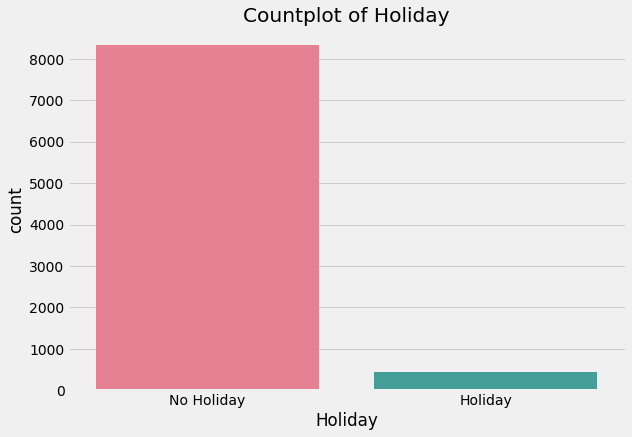

In [139]:
# Chart - 11 visualization code
sns.catplot(data = df,x = 'Holiday',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

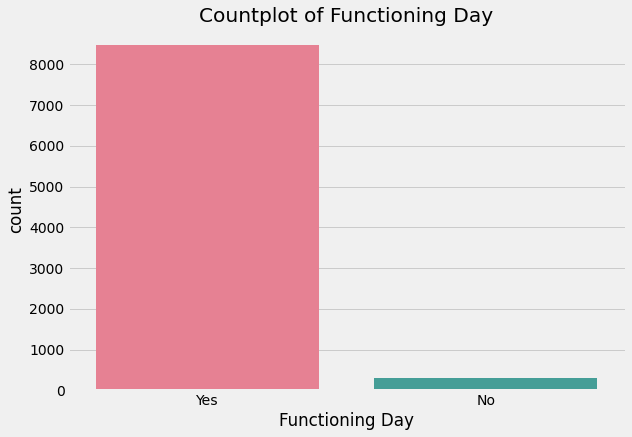

In [140]:
# Chart - 12 visualization code
sns.catplot(data = df,x = 'Functioning Day',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Functioning Day')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#BIVARIATE ANALYSIS

#### Chart - 13

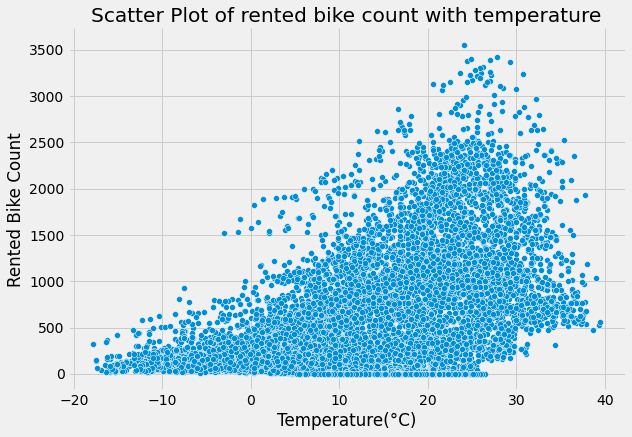

 
Correlation coefficient are :


0.5385581530139789

In [141]:
# Chart - 13 visualization code
sns.relplot(data = df,x = 'Temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with temperature')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Temperature(°C)'].corr(df['Rented Bike Count'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Chart - 14

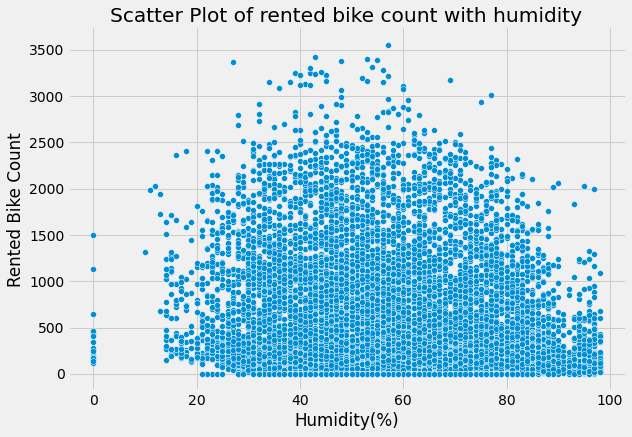

 
Correlation coefficient are :


-0.19978016700089823

In [142]:
# Chart - 14 Visualization code
sns.relplot(data = df,x = 'Humidity(%)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with humidity')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Humidity(%)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 15

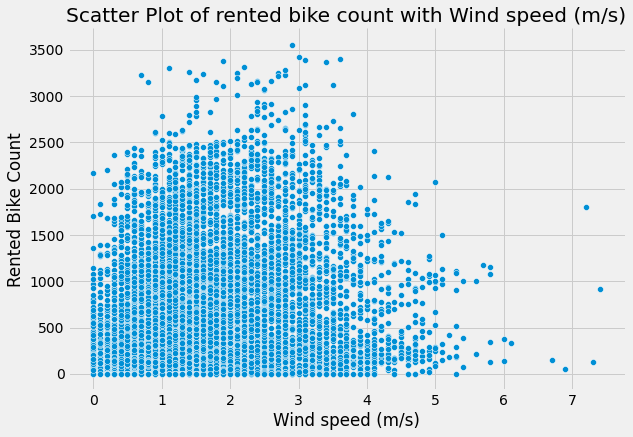

 
Correlation coefficient are :


0.12110844818838669

In [143]:
# Chart 15 Visualization code
sns.relplot(data = df,x = 'Wind speed (m/s)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Wind speed (m/s)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Wind speed (m/s)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 16

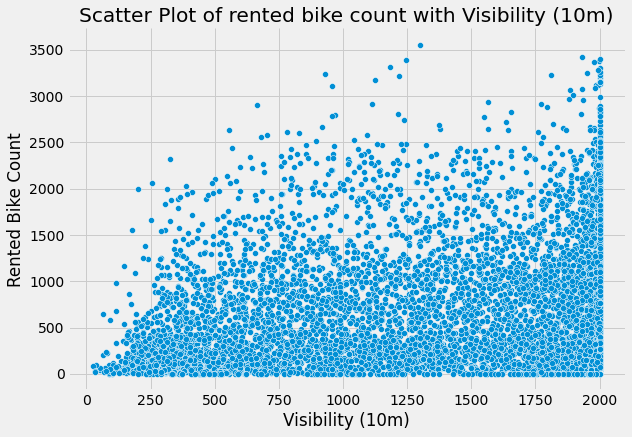

 
Correlation coefficient are :


0.19928029673135897

In [144]:
# Chart 16 Visualisation code
sns.relplot(data = df,x = 'Visibility (10m)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Visibility (10m)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Visibility (10m)'].corr(df['Rented Bike Count'])

Chart - 17

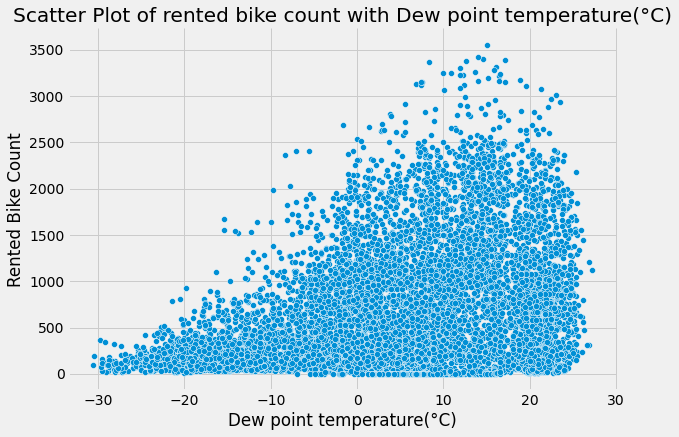

 
Correlation coefficient are :


0.37978812124497235

In [145]:
# Chart 17 Visualisation code
sns.relplot(data = df,x = 'Dew point temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Dew point temperature(°C)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Dew point temperature(°C)'].corr(df['Rented Bike Count'])

Chart - 18

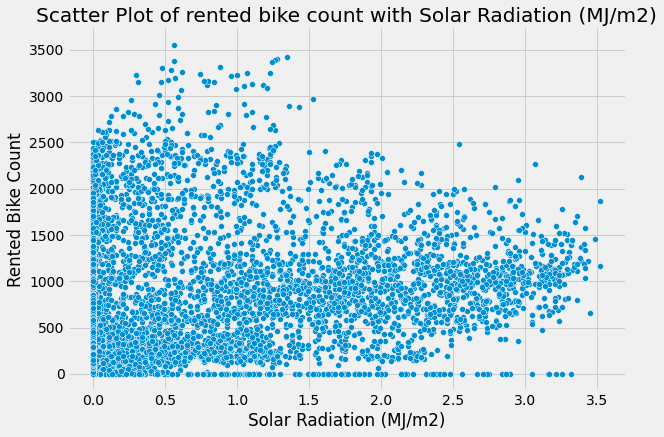

 
Correlation coefficient are :


0.261836985509591

In [146]:
# Chart 18 Visualisation code
sns.relplot(data = df,x = 'Solar Radiation (MJ/m2)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Solar Radiation (MJ/m2)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Solar Radiation (MJ/m2)'].corr(df['Rented Bike Count'])

Chart - 19

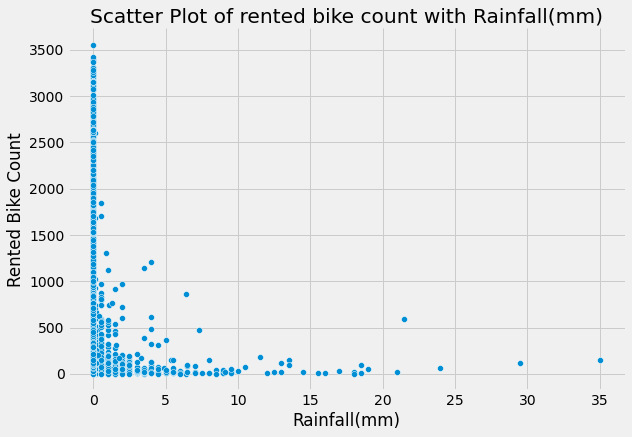

 
Correlation coefficient are :


-0.12307395980285019

In [147]:
# Chart 19 Visualisation code
sns.relplot(data = df,x = 'Rainfall(mm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Rainfall(mm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Rainfall(mm)'].corr(df['Rented Bike Count'])

Chart - 20

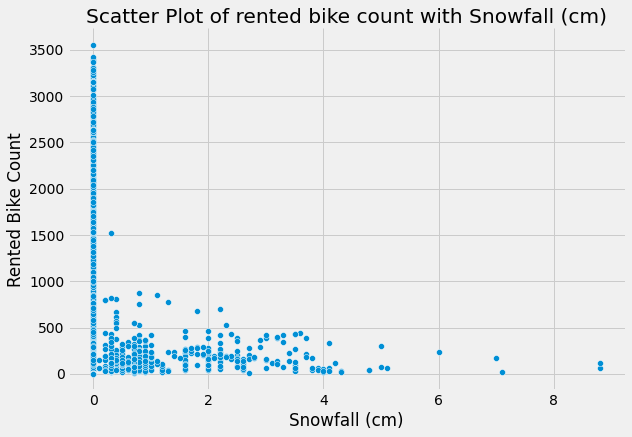

 
Correlation coefficient are :


-0.1418036499974599

In [148]:
# Chart 20 Visualisation code
sns.relplot(data = df,x = 'Snowfall (cm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Snowfall (cm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Snowfall (cm)'].corr(df['Rented Bike Count'])

Chart - 21

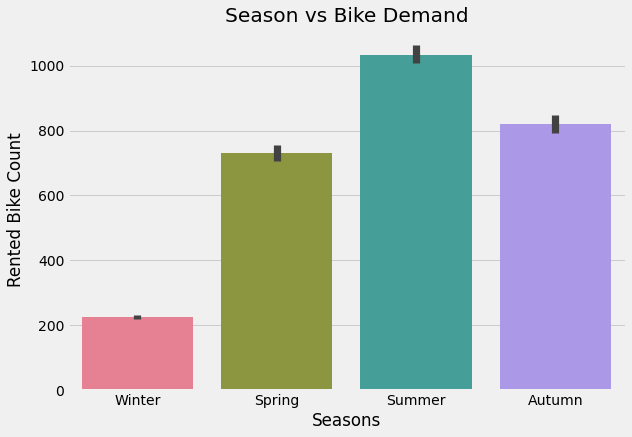

In [149]:
# Chart 21 Visualisation code
sns.catplot(data = df,x = 'Seasons',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Season vs Bike Demand')
plt.show()

Chart - 22

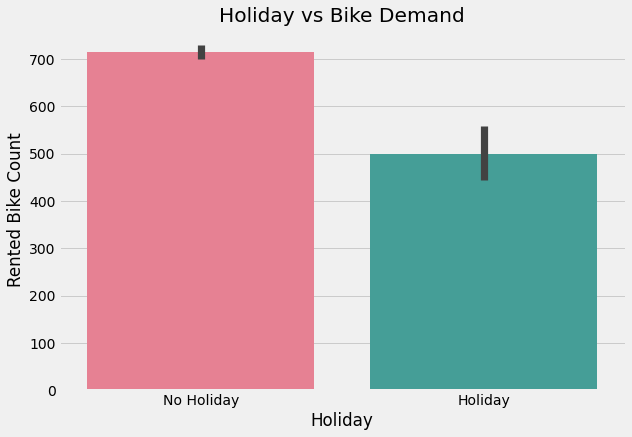

In [150]:
# Chart 22 Visualisation code
sns.catplot(data = df,x = 'Holiday',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Holiday vs Bike Demand')
plt.show()

Chart - 23

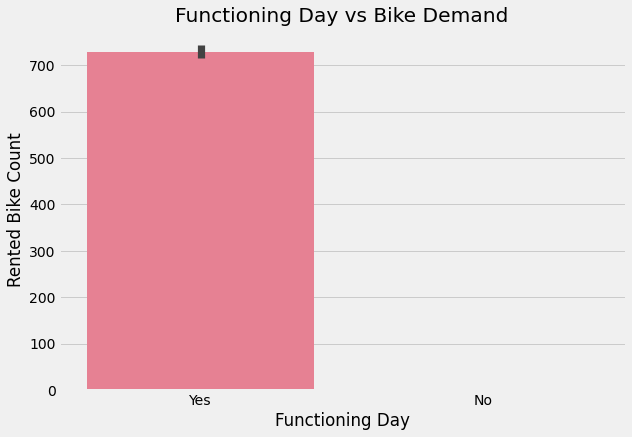

In [151]:
# Chart 23 Visualisation code
sns.catplot(data = df,x = 'Functioning Day',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Functioning Day vs Bike Demand')
plt.show()

It is clearly observed from the plot that there is no demand of 'Bikes' on Non Functioning Day.

In [152]:
# Finding the number of entries in dataset having 'Functioning Day' = 'No'
df[df['Functioning Day'] == 'No'].shape[0]

295

In [153]:
# Dropping those entries from the dataset
df = df.drop(df[df['Functioning Day'] == 'No'].index)

In [154]:
# Dropping functioning day column also
df.drop(columns = ['Functioning Day'],inplace = True)

Chart - 24

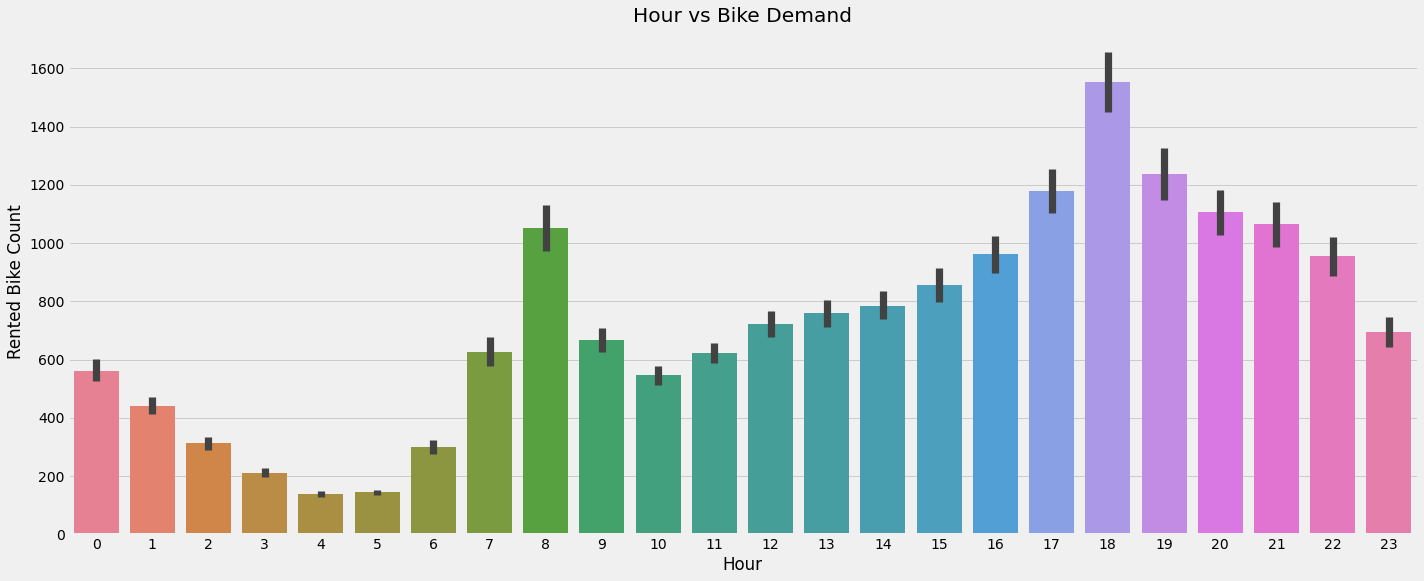

In [155]:
# Chart 24 Visualisation code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',kind = 'bar',aspect = 2.5,height = 8,palette='husl')
plt.title('Hour vs Bike Demand')
plt.show()

Chart - 25

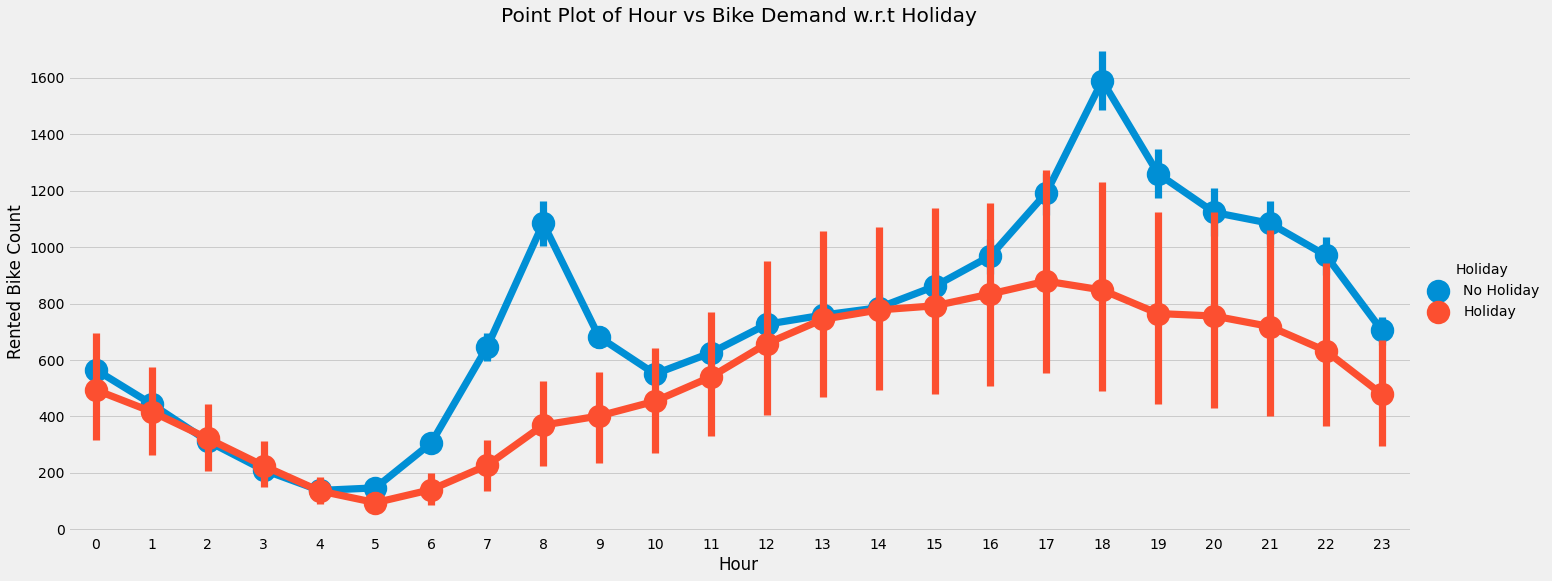

In [156]:
# Chart 25 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Holiday',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Holiday')
plt.show()


Chart - 26

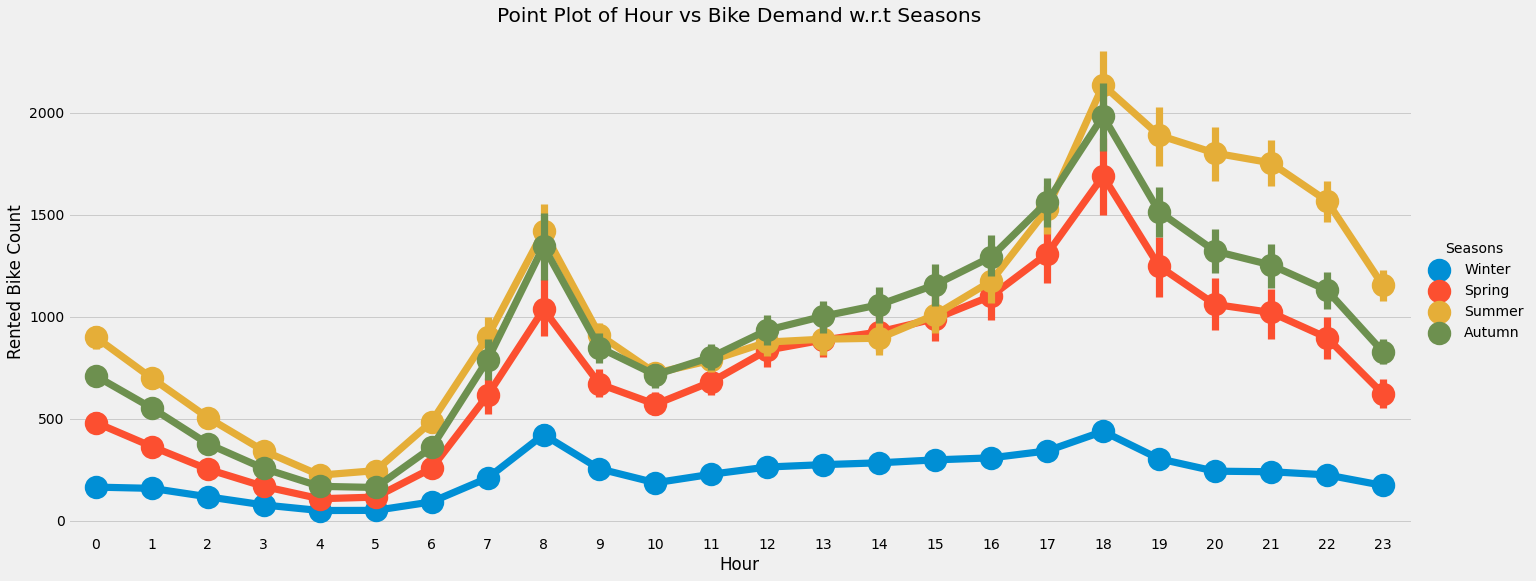

In [157]:
# Chart 26 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Seasons',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Seasons')
plt.show()

Chart-27

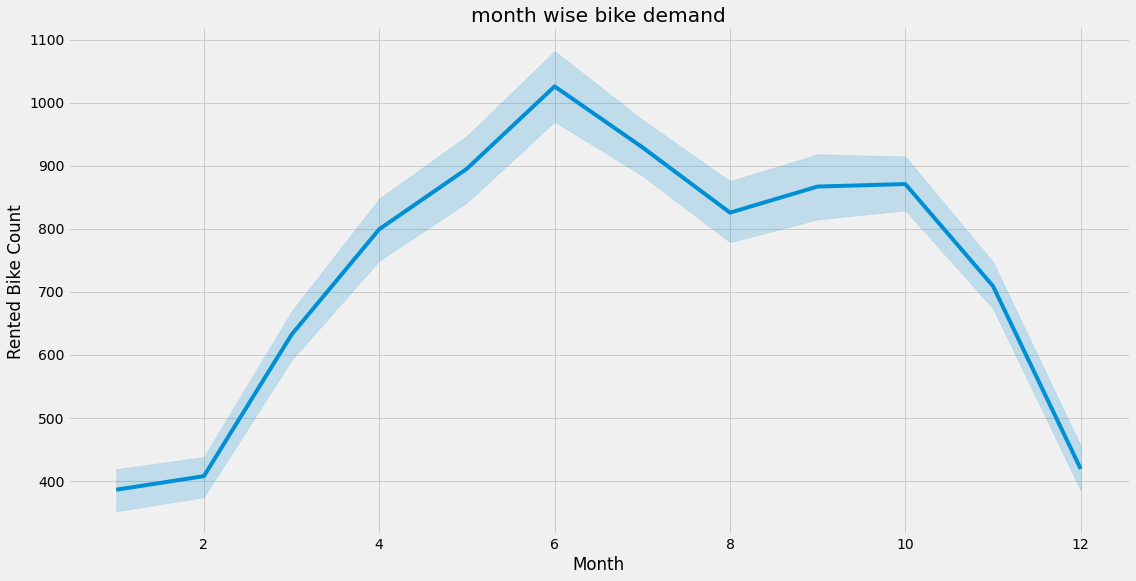

In [158]:
# Chart 27 visualization code
sns.relplot(data = df,x = 'Month',y = 'Rented Bike Count',kind = 'line',aspect = 2,height = 8)
plt.title('month wise bike demand')
plt.show()


Chart - 28

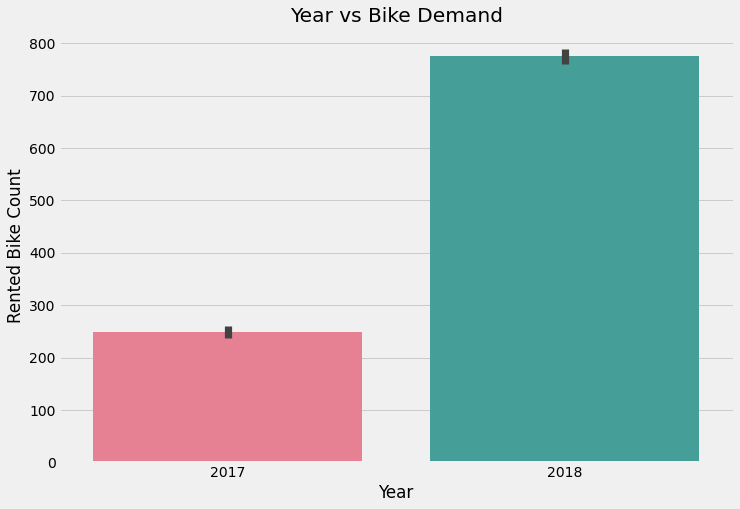

In [159]:
# Chart 28 Visualisation code
sns.catplot(data = df,x = 'Year',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 7,palette='husl')
plt.title('Year vs Bike Demand')
plt.show()

#### Chart - 29 - Correlation Heatmap

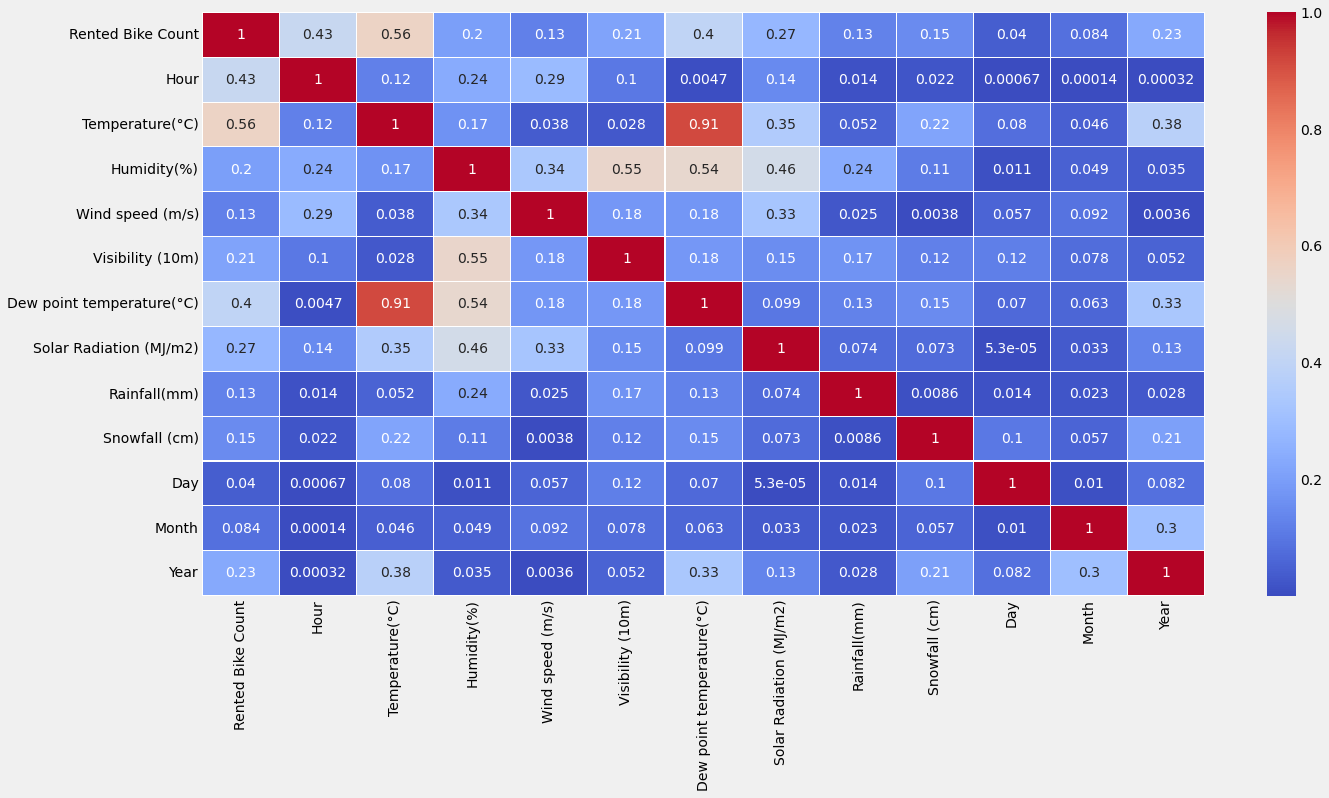

In [160]:
# Correlation Heatmap visualization code  
data_corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(abs(data_corr), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [161]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Day                          0
Month                        0
Year                         0
dtype: int64

####No missing values are present in the dataset.

### 2. Handling Outliers

In [162]:
# Lokking numeric features
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [163]:
len(numerical_features)

13

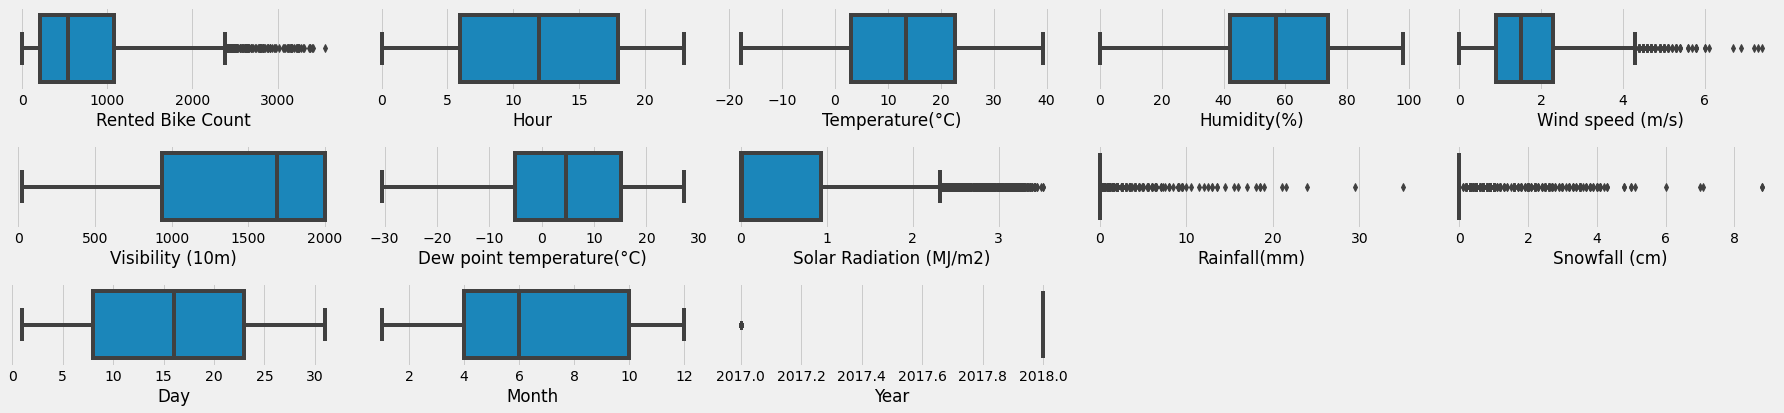

In [164]:
# Plotting Box Plot for numerical features
plt.figure(figsize=(25,15))

for i in range(0,len(numerical_features)):
  plt.subplot(8,5,i+1)
  sns.boxplot(data = df,x = numerical_features[i])
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

In [165]:
# Checking skewness for numerical features.
for items in numerical_features:
  print(f'Skewness of feature {items} is : {df[items].skew()}')
  print("")

Skewness of feature Rented Bike Count is : 1.1397000550865888

Skewness of feature Hour is : -0.0012605476046427164

Skewness of feature Temperature(°C) is : -0.17454981832982763

Skewness of feature Humidity(%) is : 0.06864897817546713

Skewness of feature Wind speed (m/s) is : 0.8942215019566562

Skewness of feature Visibility (10m) is : -0.6953061678112851

Skewness of feature Dew point temperature(°C) is : -0.3387747528330898

Skewness of feature Solar Radiation (MJ/m2) is : 1.5100650462311918

Skewness of feature Rainfall(mm) is : 14.616921282975433

Skewness of feature Snowfall (cm) is : 8.29283026085502

Skewness of feature Day is : -0.019048561159293244

Skewness of feature Month is : 0.012911443375853378

Skewness of feature Year is : -2.911537892649564



In [166]:
# Handling Outliers & Outlier treatments
def outlier_detection(features):
  percentile_25 = df[features].quantile(0.25)
  percentile_75 = df[features].quantile(0.75)
  IQR = percentile_75 - percentile_25
  upper_limit = percentile_75 + 1.5 * IQR
  lower_limit = percentile_25 - 1.5 * IQR
  return df[(df[features] > upper_limit) | (df[features] < lower_limit)].shape[0]


####From the box plot shown above there may be outliers present in the column "Rented Bike Count" and "wind Speed"

In [167]:
# Checking number of data points in column "Rented Bike Count" which can be considerd as an outliers"
outlier_detection('Rented Bike Count')

152

In [168]:
# Checking number of data points in column "Wind Speed" which can be considerd as an outliers"
outlier_detection('Wind speed (m/s)')

154

In [169]:
# checking number of rows in dataset
df.shape[0]

8465

####As the dataset has only 8465 rows which is a small dataset,I think outlier removal is not a good technique.We perform some transformation in later part of this project then again we look for outlier treatment.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [170]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [171]:
categorical_features = list(set(df.columns.tolist()) - set(df.describe().columns.tolist()))

In [172]:
categorical_features

['Seasons', 'Holiday']

In [173]:
# Fetching unique values in categorical features 
for elem in categorical_features:
  print(f'Unique values in {elem} are :{df[elem].unique()}')
  print("")

Unique values in Seasons are :['Winter' 'Spring' 'Summer' 'Autumn']

Unique values in Holiday are :['No Holiday' 'Holiday']



In [174]:
# Encode your categorical columns
df_new = pd.get_dummies(df,columns=categorical_features,drop_first = True)
df_new.sample(5)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
7877                193     5              7.8           85               0.9   
327                 301    15             -2.5           29               1.1   
2647                605     7              1.4           43               1.5   
4579               1058    19             25.7           47               1.8   
5983               1059     7             27.0           69               0.8   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
7877              1542                        5.4                     0.00   
327               1667                      -18.1                     0.48   
2647              2000                       -9.8                     0.00   
4579              2000                       13.5                     0.04   
5983              2000                       20.8                     0.23   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Year  Seasons_Spring  \
7877           0.0            0.0   25     10  2018               0   
327            0.0            0.0   14     12  2017               0   
2647           0.0            0.0   21      3  2018               1   
4579           0.0            0.0    6      9  2018               0   
5983           0.0            0.0    8      7  2018               0   

      Seasons_Summer  Seasons_Winter  Holiday_No Holiday  
7877               0               0                   1  
327                0               1                   1  
2647               0               0                   1  
4579               1               0                   1  
5983               1               0                   1

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [175]:
# Manipulate Features to minimize feature correlation and create new features


In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(df):
# VIF Dataframe
  vif_df = pd.DataFrame()
  vif_df['feature'] = df.columns

# calculating VIF for each feature
  vif_df['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
  return vif_df

In [177]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

feature         VIF
0                        Hour    4.450425
1             Temperature(°C)  185.510084
2                 Humidity(%)  182.909204
3            Wind speed (m/s)    4.866596
4            Visibility (10m)   10.737733
5   Dew point temperature(°C)  126.862428
6     Solar Radiation (MJ/m2)    2.890387
7                Rainfall(mm)    1.104193
8               Snowfall (cm)    1.154571
9                         Day    4.440890
10                      Month    4.664346
11                       Year  399.153809

In [178]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

feature        VIF
0                      Hour   4.440749
1           Temperature(°C)   3.524414
2               Humidity(%)  23.509471
3          Wind speed (m/s)   4.859930
4          Visibility (10m)  10.674435
5   Solar Radiation (MJ/m2)   2.746136
6              Rainfall(mm)   1.090794
7             Snowfall (cm)   1.149582
8                       Day   4.440079
9                     Month   4.662932
10                     Year  63.022573

In [179]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year']]])

feature       VIF
0                     Hour  4.019820
1          Temperature(°C)  3.168105
2              Humidity(%)  6.733950
3         Wind speed (m/s)  4.639585
4         Visibility (10m)  5.455767
5  Solar Radiation (MJ/m2)  2.269320
6             Rainfall(mm)  1.082799
7            Snowfall (cm)  1.138514
8                      Day  3.847679
9                    Month  4.546114

In [180]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)']]])

feature       VIF
0                     Hour  4.007360
1          Temperature(°C)  2.602665
2         Wind speed (m/s)  4.386313
3         Visibility (10m)  5.426576
4  Solar Radiation (MJ/m2)  1.894175
5             Rainfall(mm)  1.047690
6            Snowfall (cm)  1.112562
7                      Day  3.406064
8                    Month  3.878156

In [181]:
vif_calc(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Year',
                                                           'Humidity(%)','Visibility (10m)']]])

feature       VIF
0                     Hour  3.856814
1          Temperature(°C)  2.579765
2         Wind speed (m/s)  3.876503
3  Solar Radiation (MJ/m2)  1.891896
4             Rainfall(mm)  1.031539
5            Snowfall (cm)  1.103869
6                      Day  3.302003
7                    Month  3.290773

In [182]:
# So according to above results droppping ['Rented Bike Count','Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)']
df_new.drop(columns = ['Dew point temperature(°C)','Year','Humidity(%)','Visibility (10m)'],inplace = True)

#### 2. Feature Selection

In [183]:
# Select your features wisely to avoid overfitting
df_new.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday'],
      dtype='object')

In [184]:
# Separating input and output variables
x = df_new.iloc[:,1:]
y = df_new.loc[:,'Rented Bike Count']


In [185]:
len(df_new.columns)

13

In [186]:
x.columns

Index(['Hour', 'Temperature(°C)', 'Wind speed (m/s)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday'],
      dtype='object')

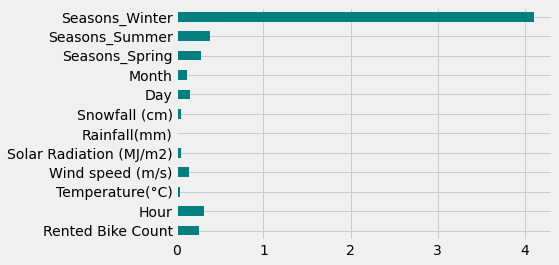

In [187]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(x,y)
feature_importances = pd.Series(importances,df_new.columns[0:len(df_new.columns) - 1])
feature_importances.plot(kind = 'barh',color = 'teal')
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [188]:
# Transform Your data


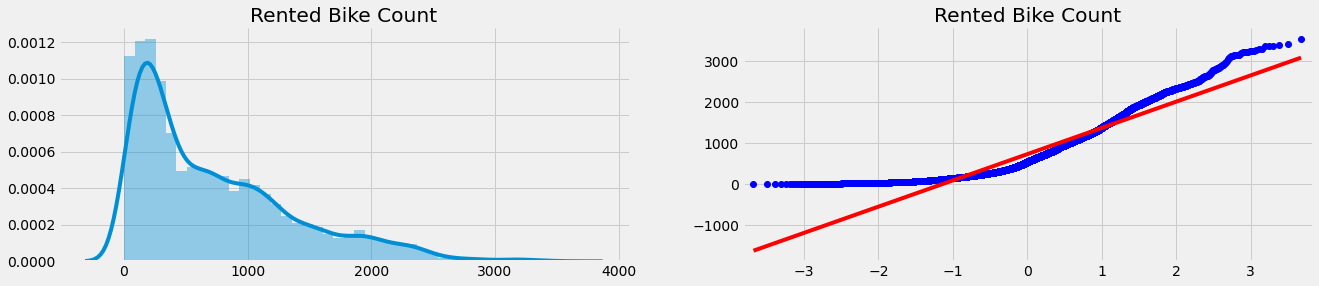

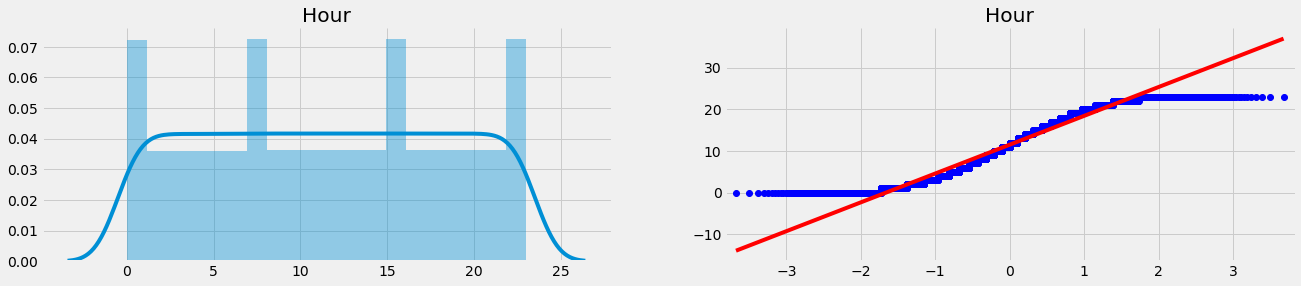

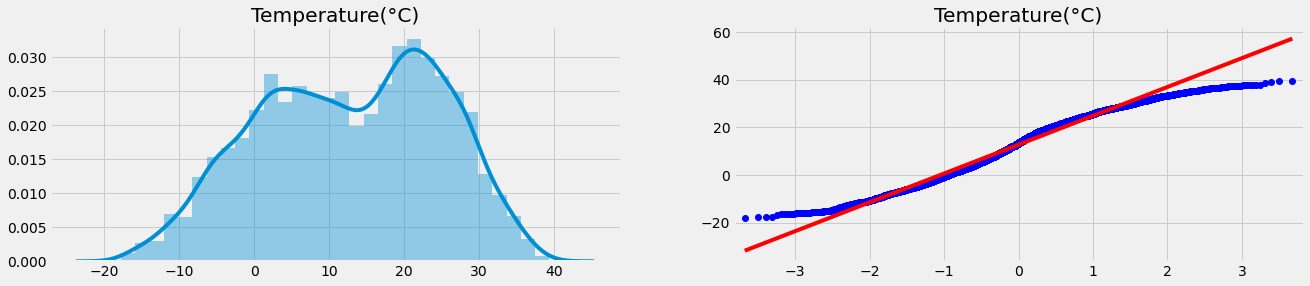

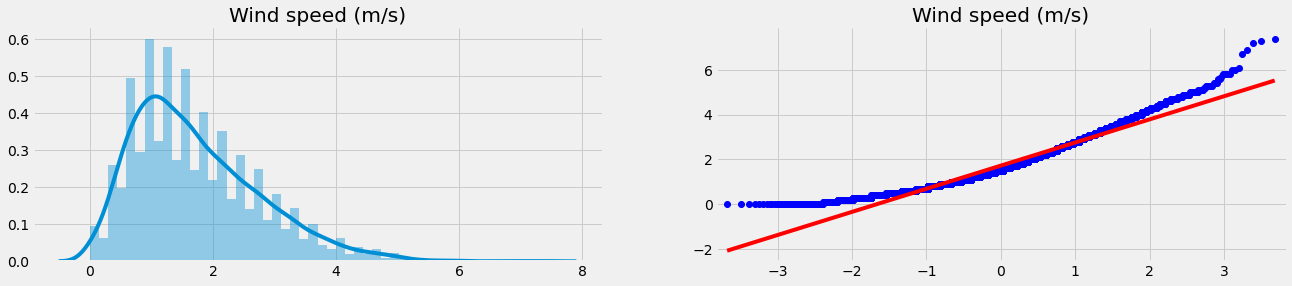

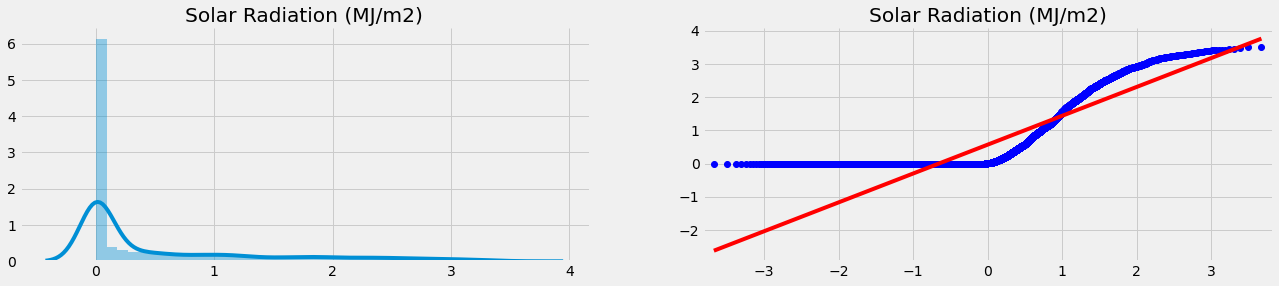

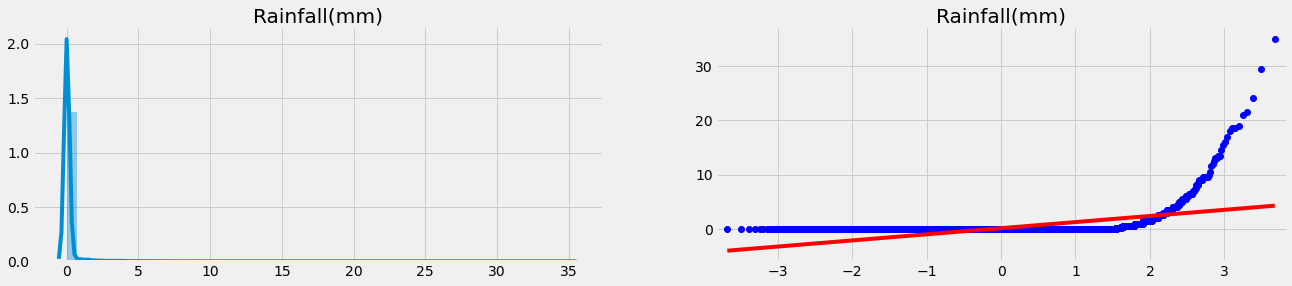

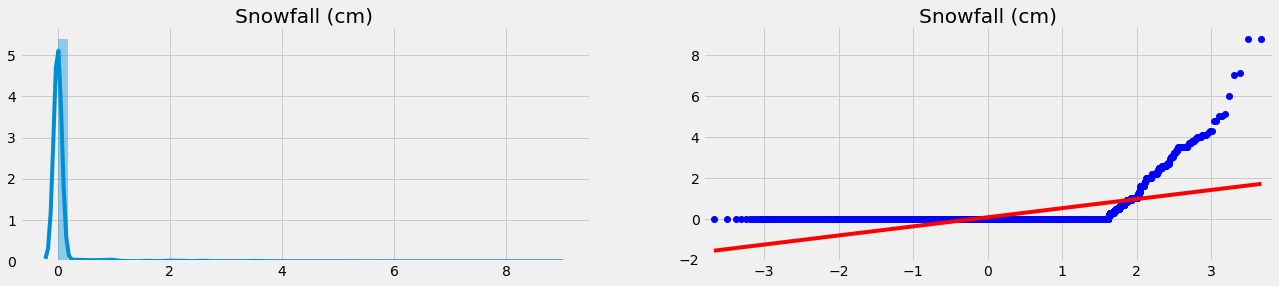

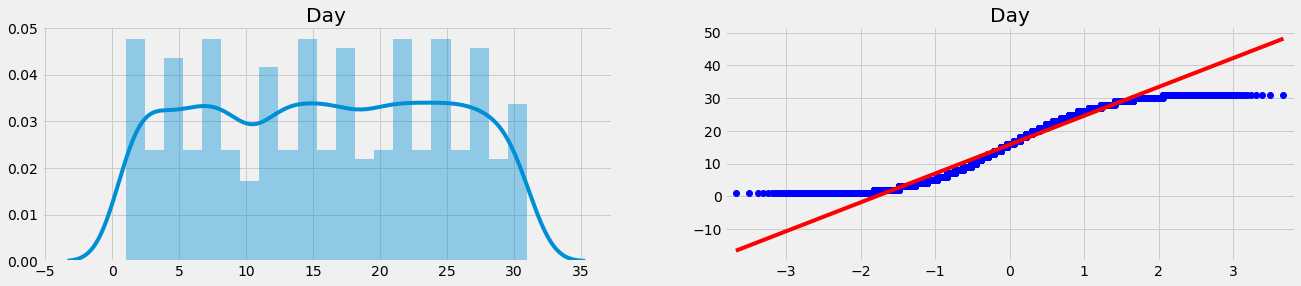

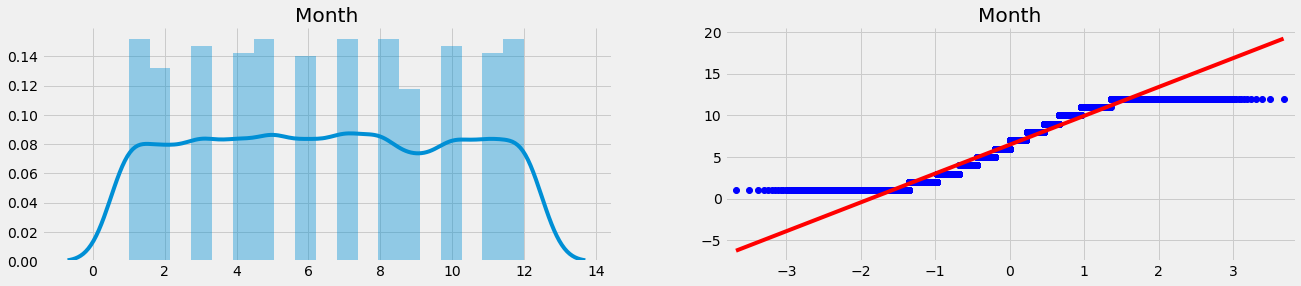

In [189]:
import scipy.stats as stats
from matplotlib import gridspec
from statsmodels.graphics.gofplots import qqplot

# select the features that we want to plot
features = ['Rented Bike Count','Hour', 'Temperature(°C)','Wind speed (m/s)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day','Month']# Skipping Rest features because they are categorical in nature

# Iterate over the features
for feature in features:
    # creating a figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    # Ploting a distplot 
    sns.distplot(df_new[feature], ax=ax1)
    # Ploting a Q-Q plot 
    qqplot(df_new[feature], line='s',ax=ax2)
    #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    # Show the plot
    plt.show() 

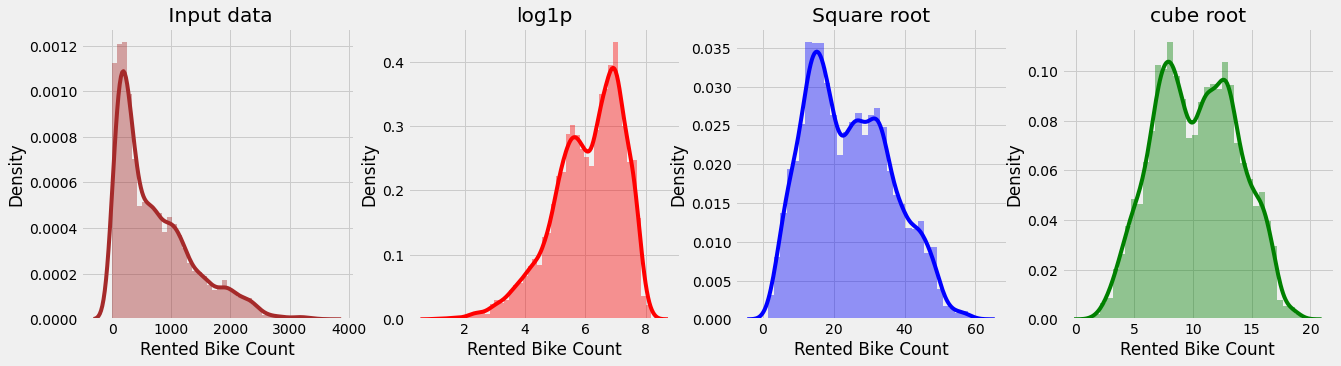

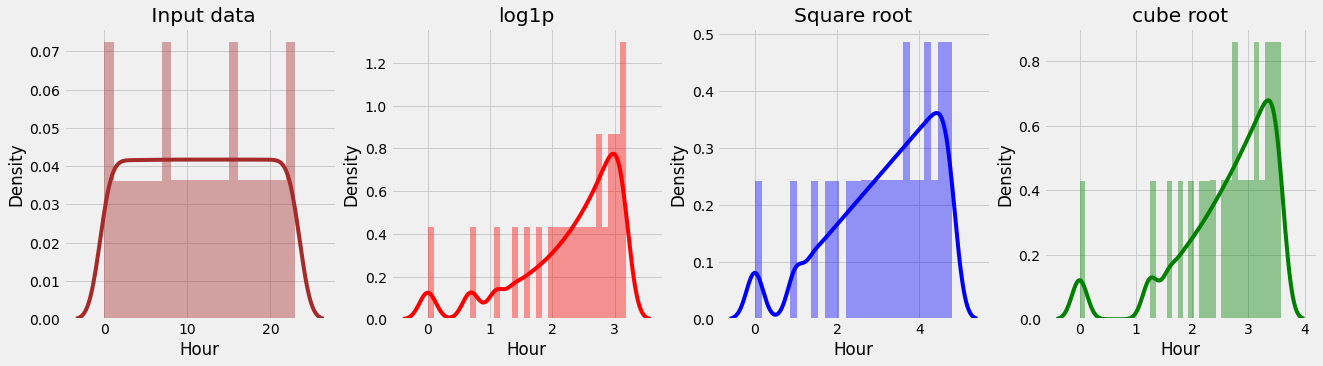

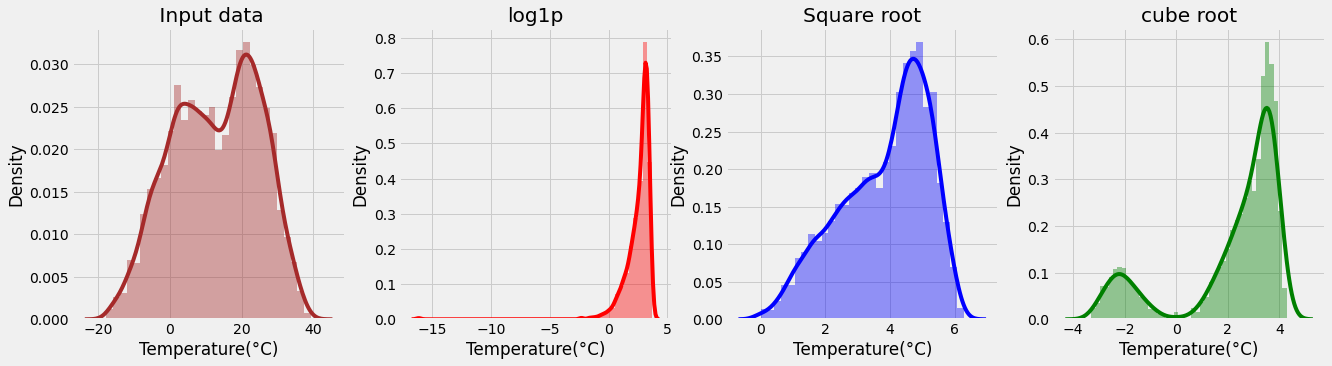

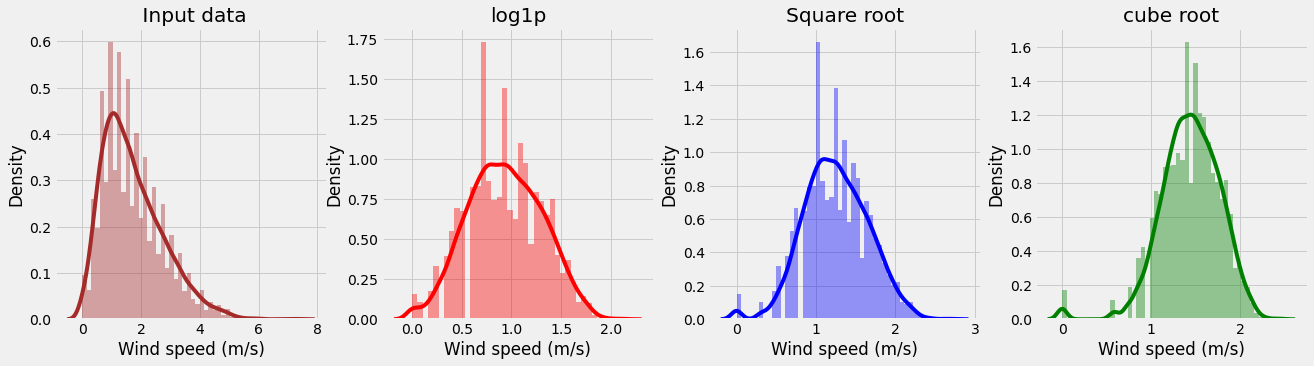

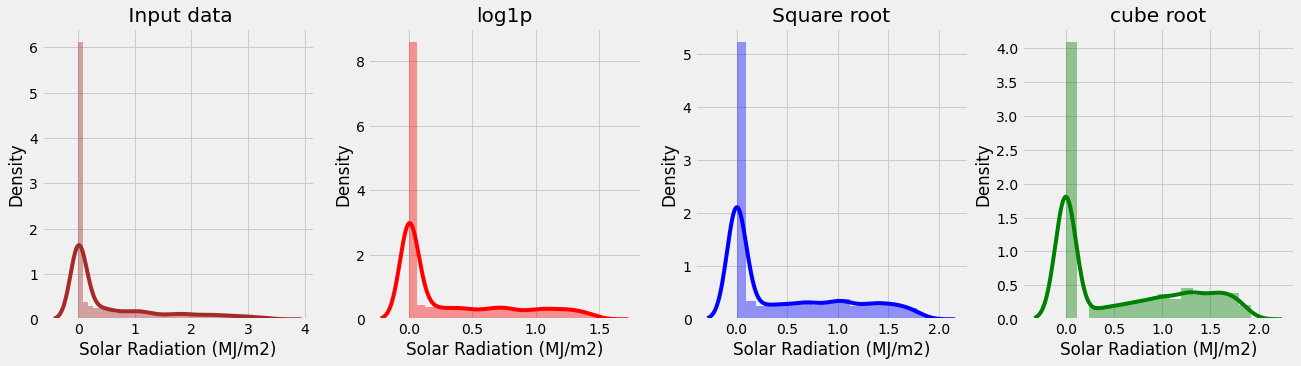

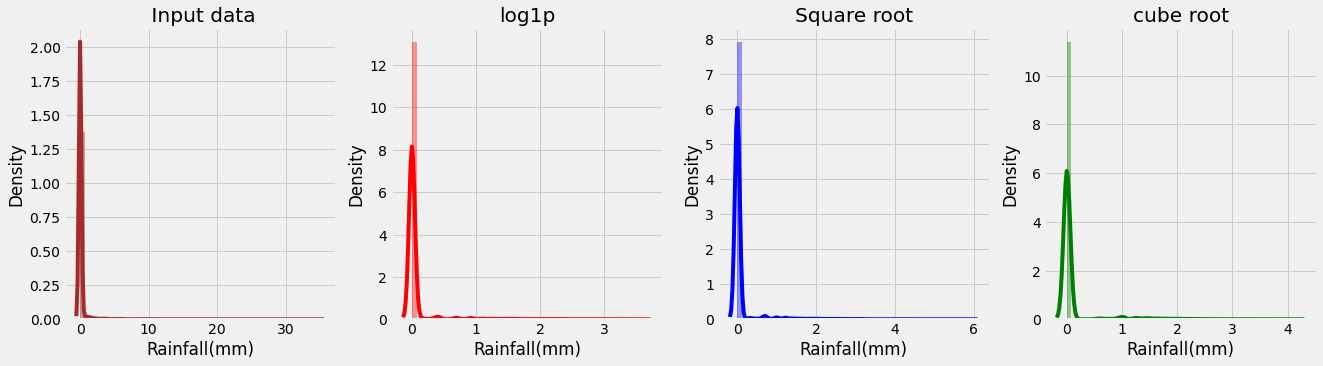

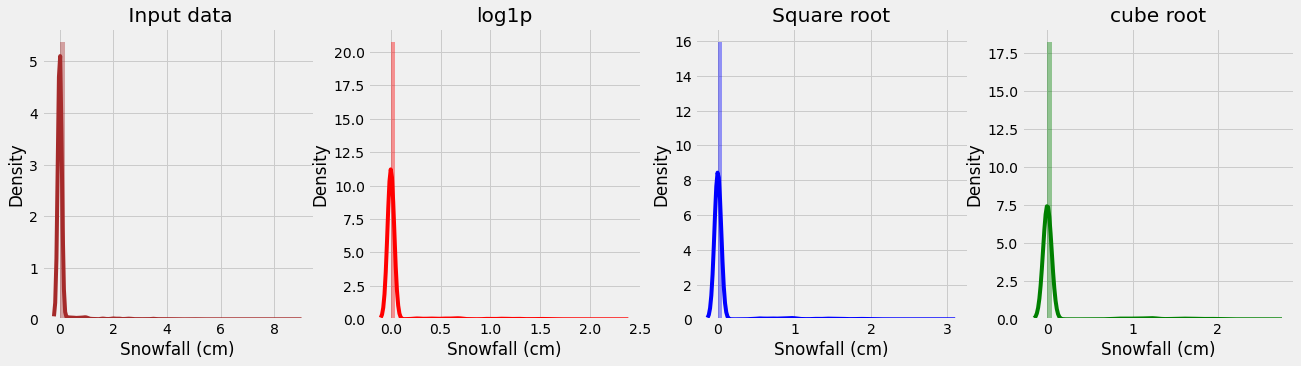

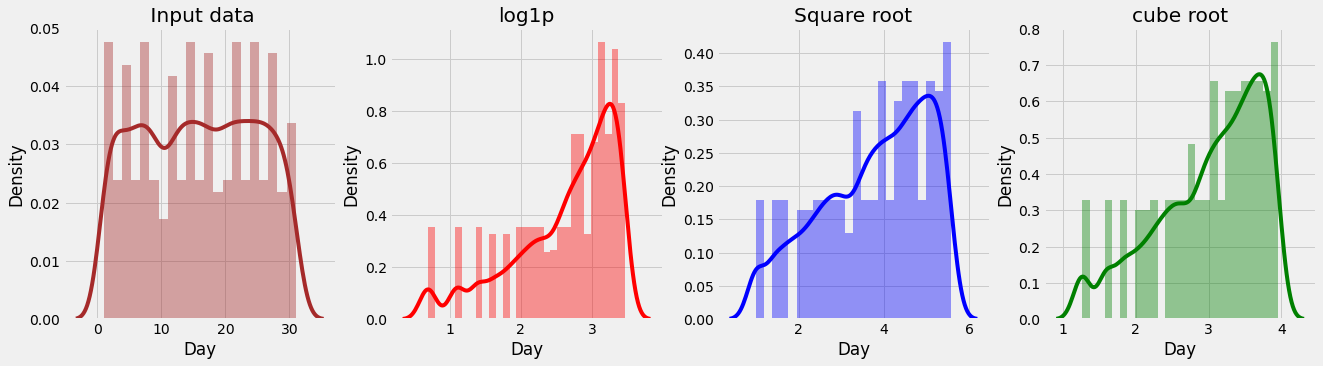

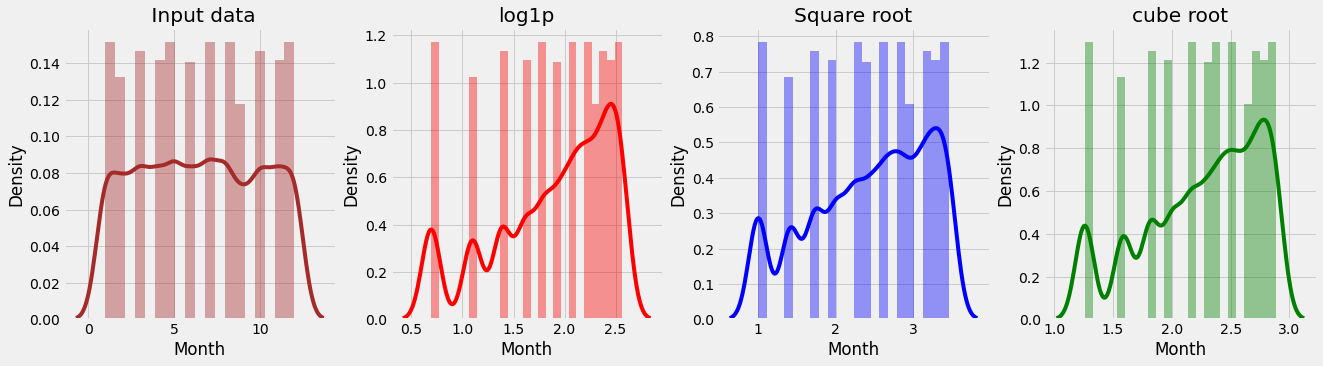

In [190]:
#apply diffrent tranformation technique and checking data distributation
for feature in features:
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((df_new[feature]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log1p(df_new[feature]+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value so adding 0.0000001 in data
  sns.distplot(np.sqrt(df_new[feature]),ax=axes[2], color='blue').set_title("Square root")
  sns.distplot(np.cbrt(df_new[feature]*2),ax=axes[3], color='green').set_title("cube root")

In [191]:
# Creating a function so that we can apply some transformation and visualize the changes occured due to transformation.
def transformation(feature,kind):
  for feature in features:
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (20,4))
    sns.distplot(df_new[feature],color = 'red',ax = ax1)
    qqplot(df_new[feature],line = 's',ax = ax2)
    if kind == np.log1p:
      sns.distplot(kind(df_new[feature]+0.0000001),color = 'green',ax = ax3)
    else:
      sns.distplot(kind(df_new[feature]),color = 'green',ax = ax3)

     
    qqplot(kind(df_new[feature]),line = 's',ax = ax4)
     #removing the spines 
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['right'].set_visible(False)
     # removing the axis labels
    ax1.set(xlabel='', ylabel='',title = feature)
    ax2.set(xlabel='', ylabel='',title = feature)
    ax3.set(xlabel='', ylabel='',title = f'transformed {feature}')
    ax4.set(xlabel='',ylabel='',title = f'transformed {feature}')

    # Show the plot
  return plt.show() 





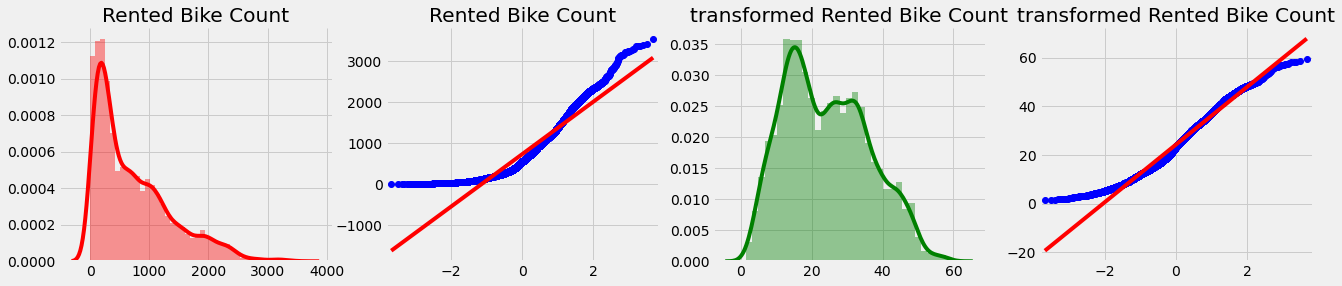

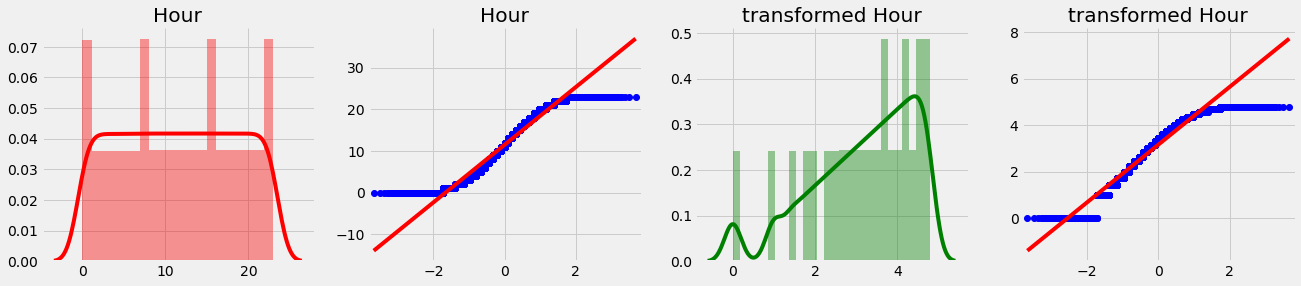

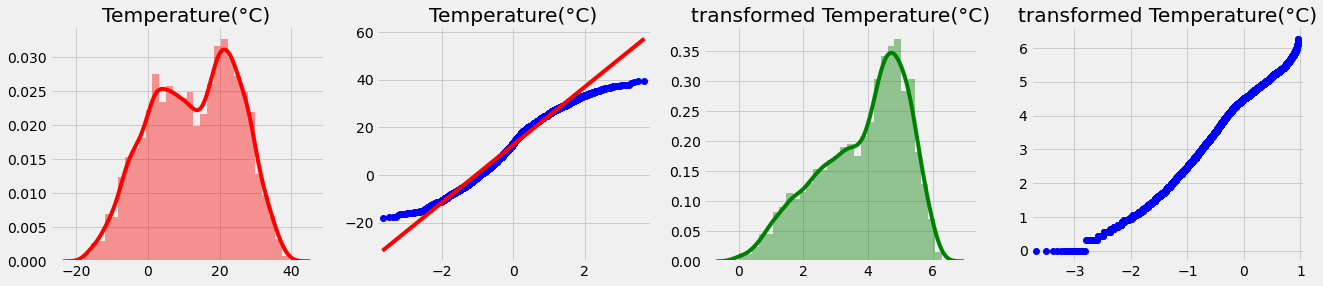

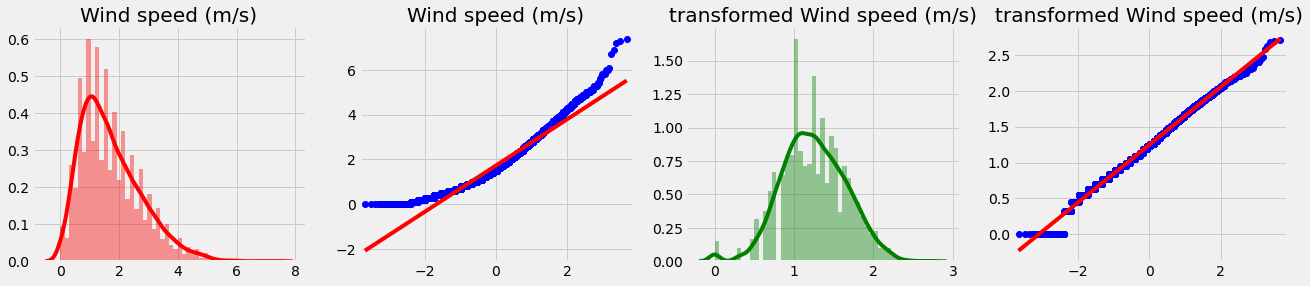

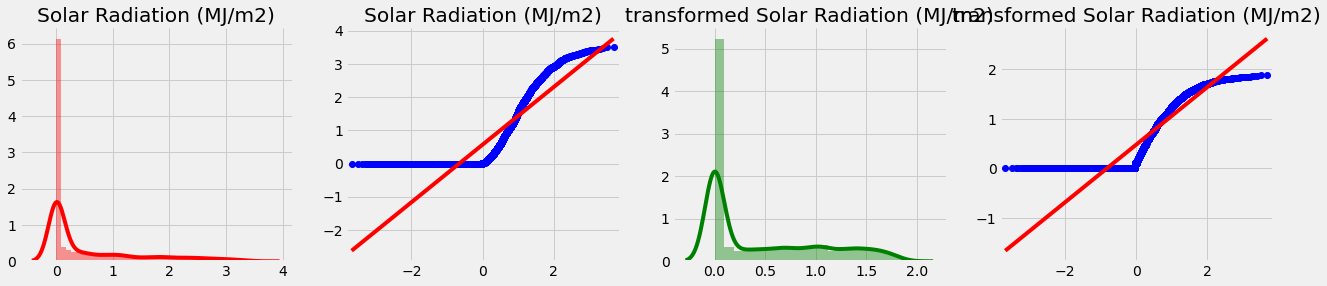

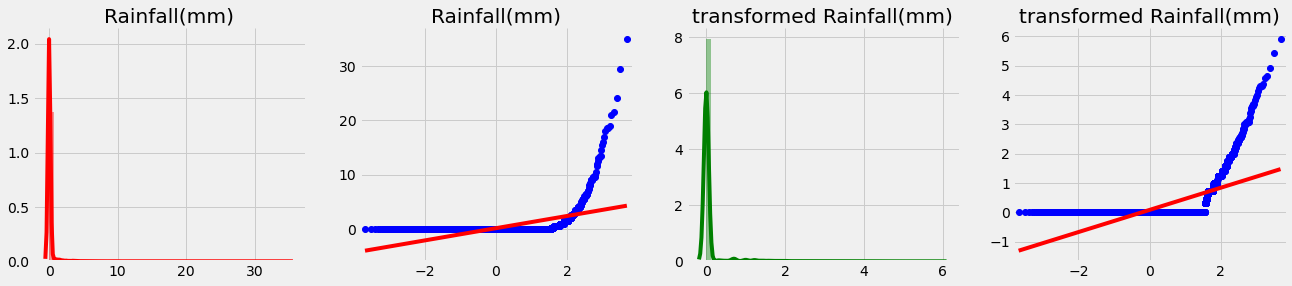

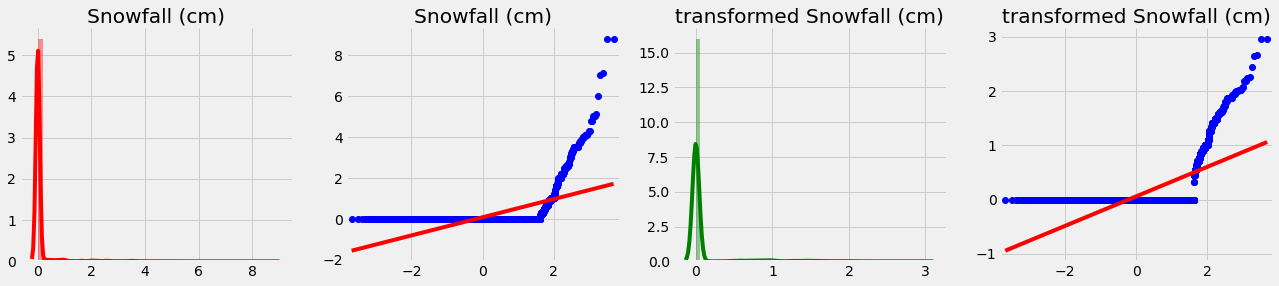

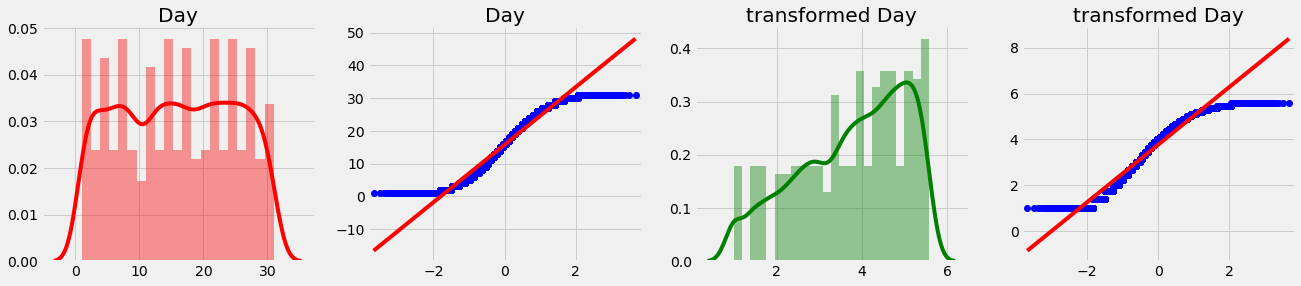

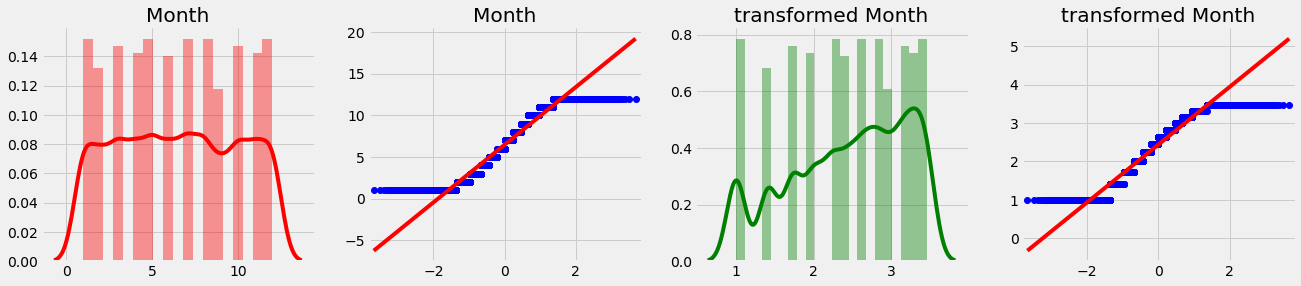

In [192]:
# Applying square root transformation
transformation(features,np.sqrt)

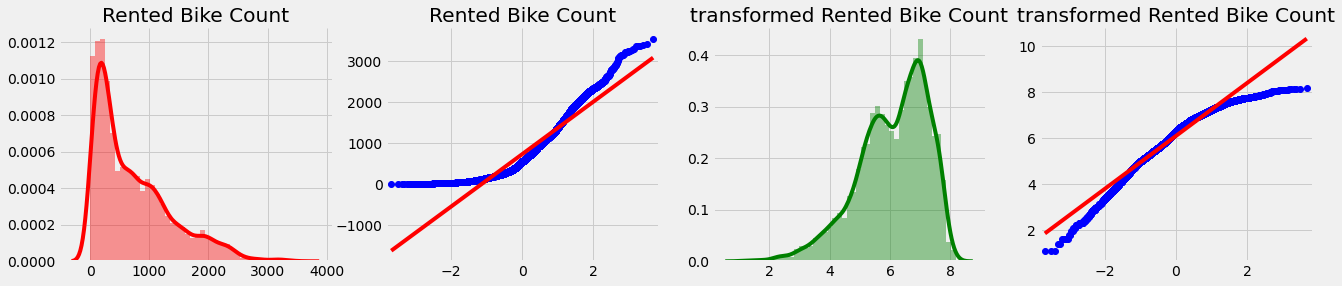

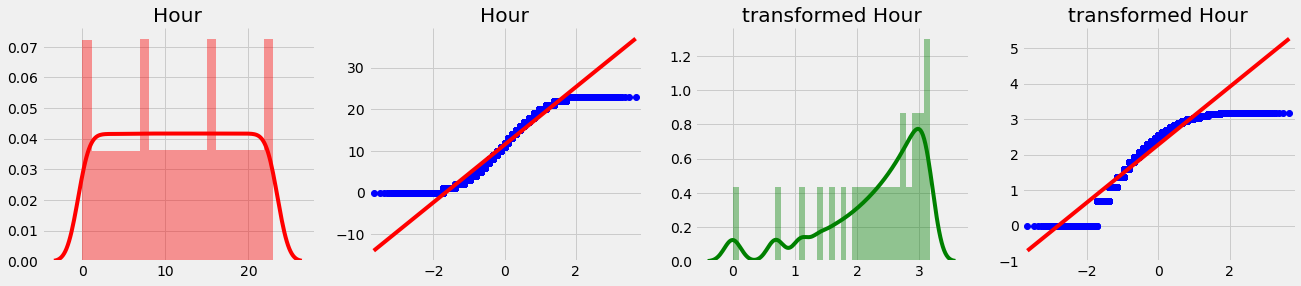

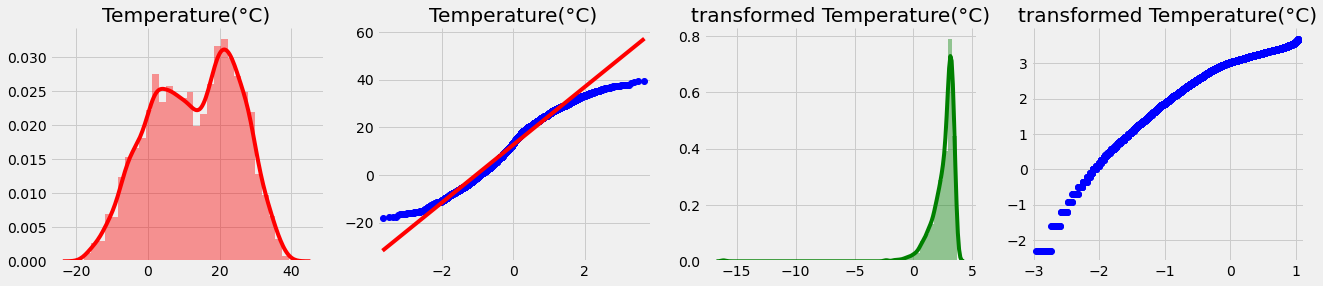

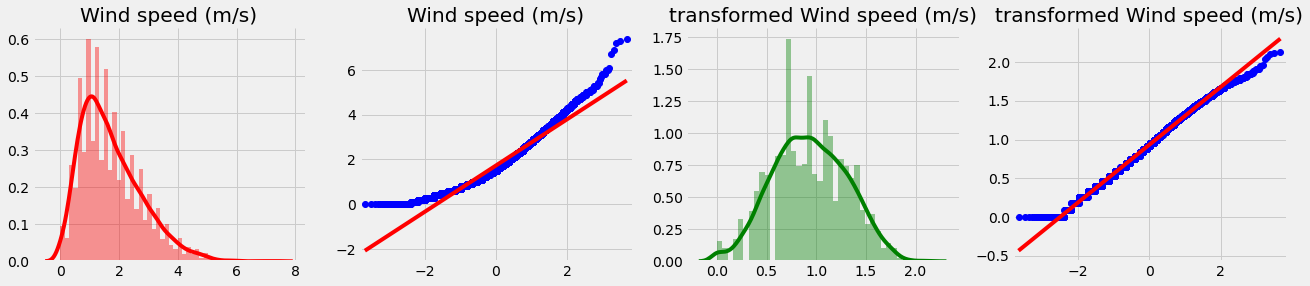

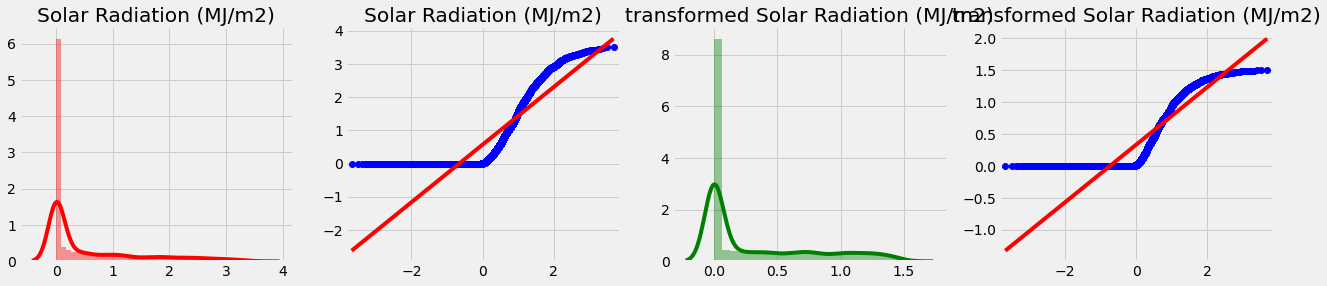

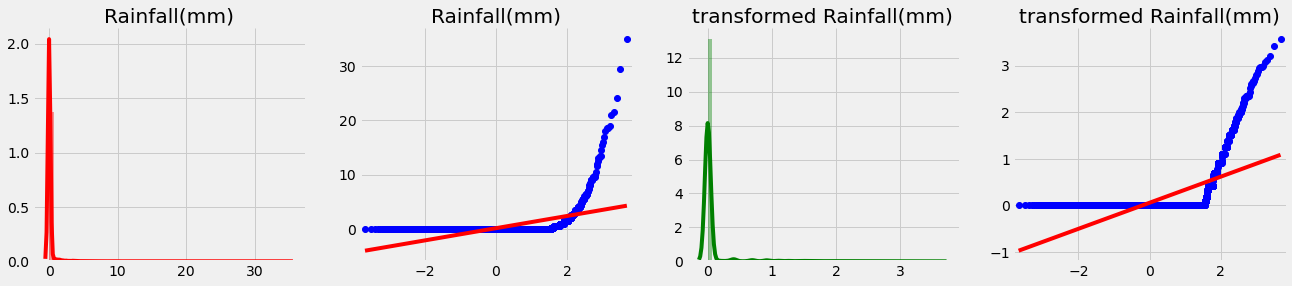

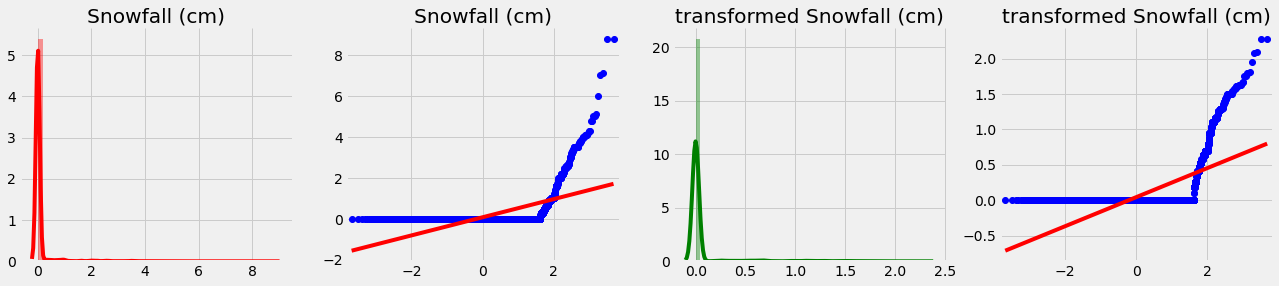

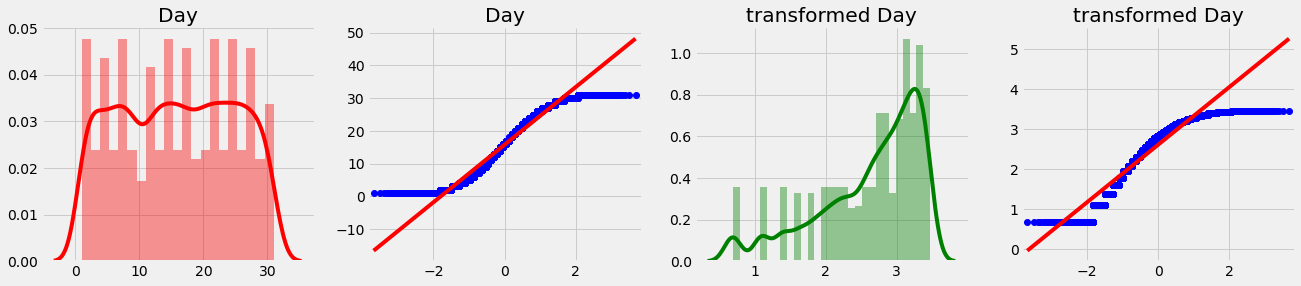

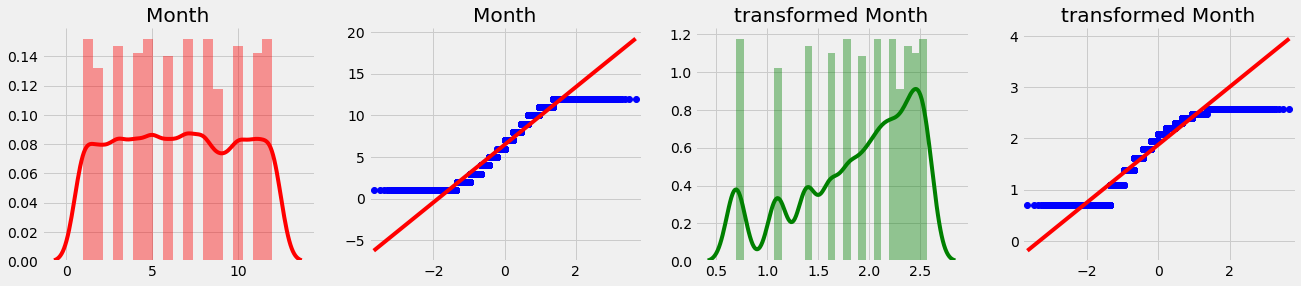

In [193]:
# Applying logarithmic transformation
transformation(features,np.log1p)

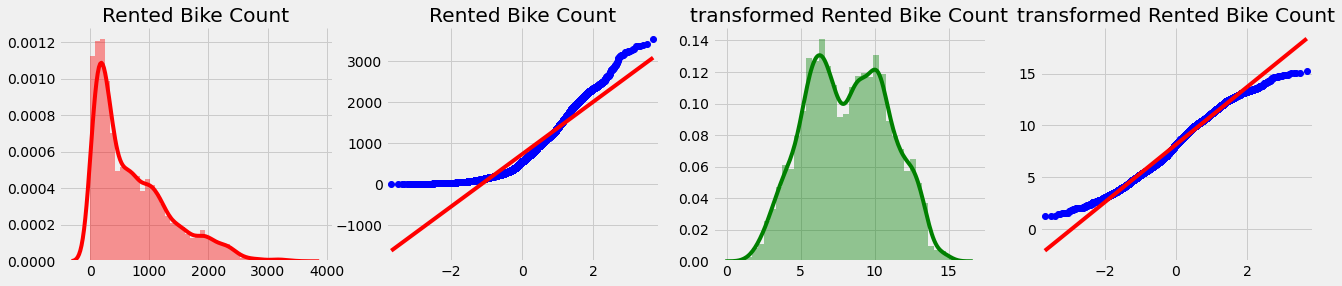

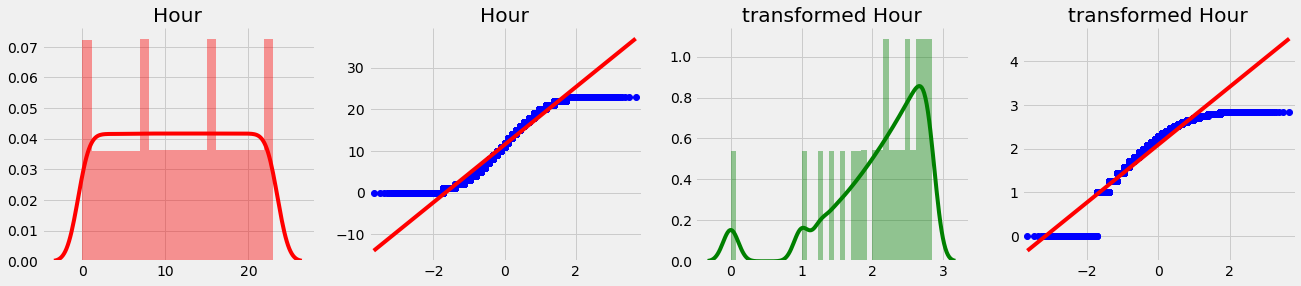

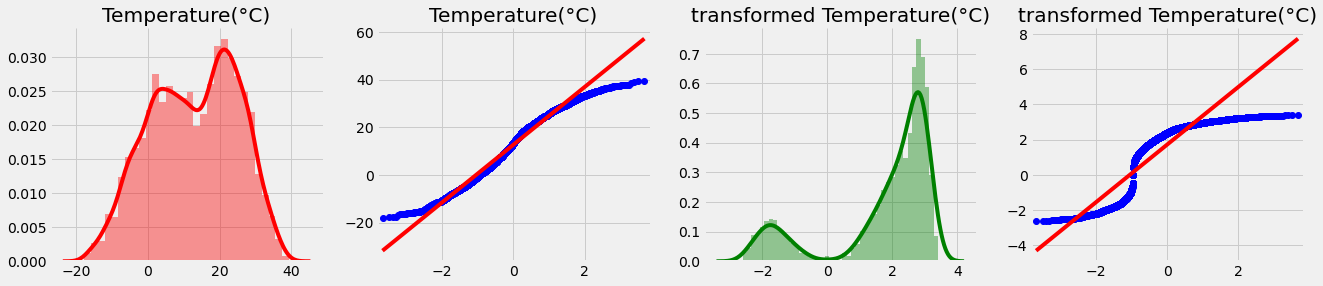

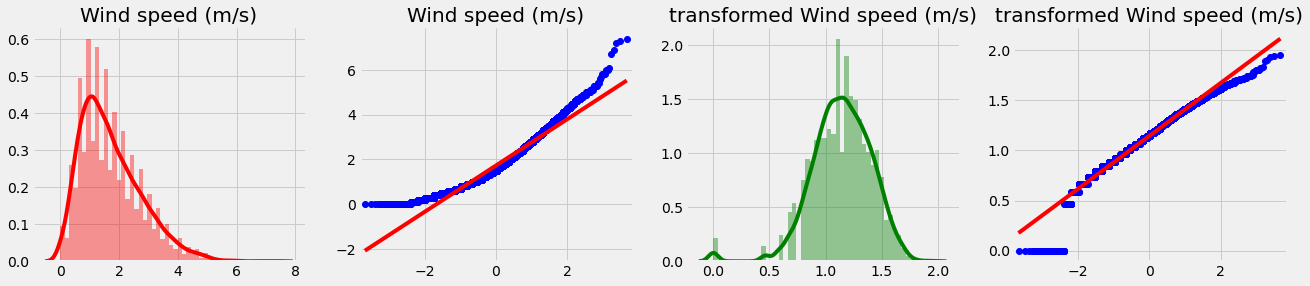

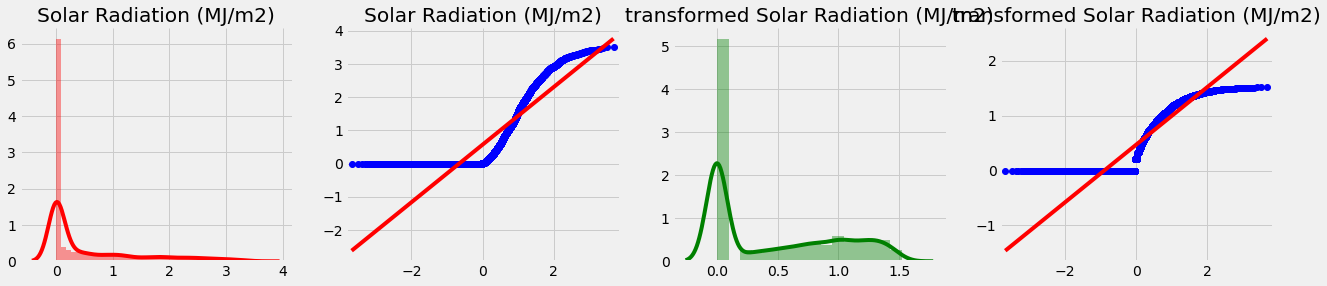

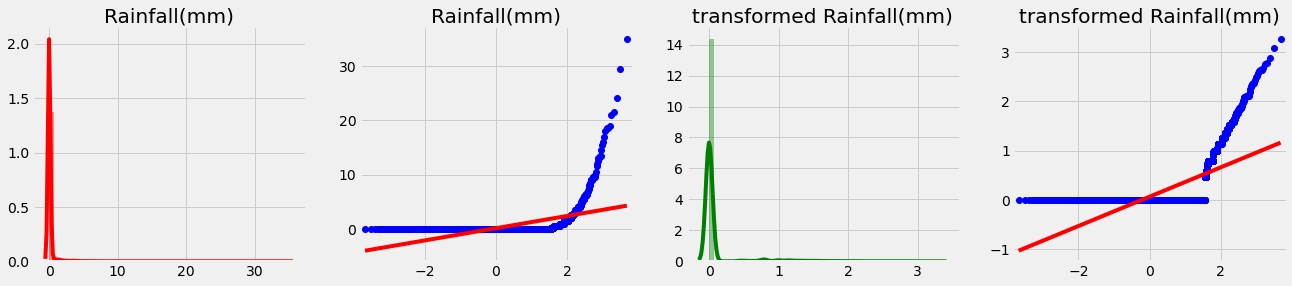

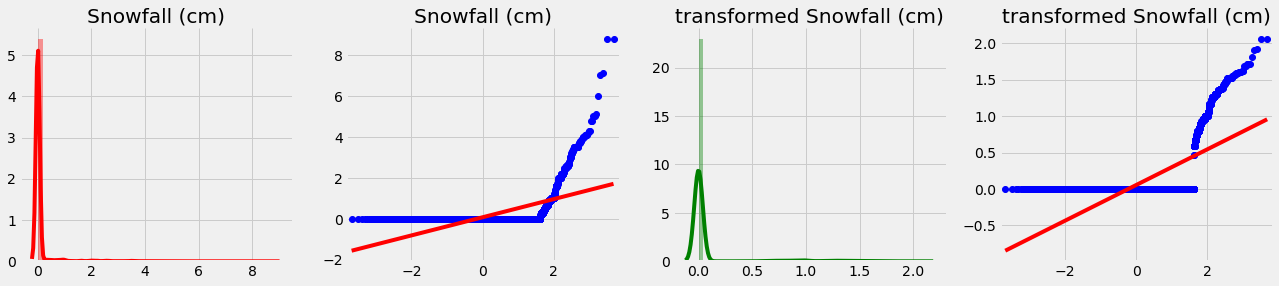

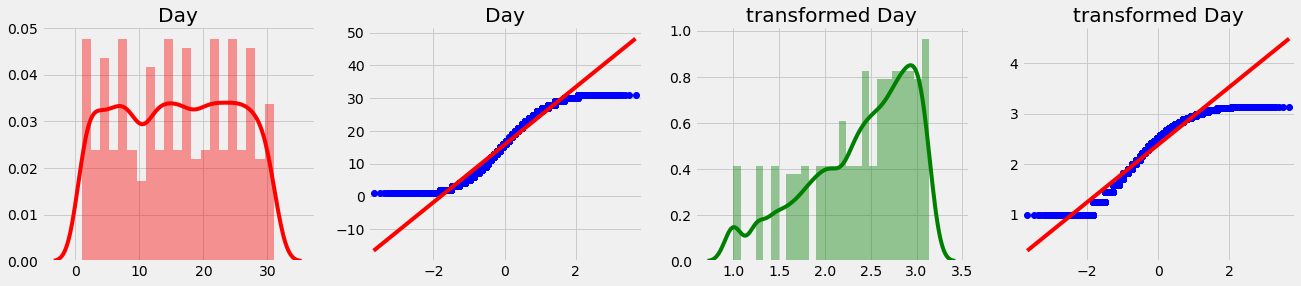

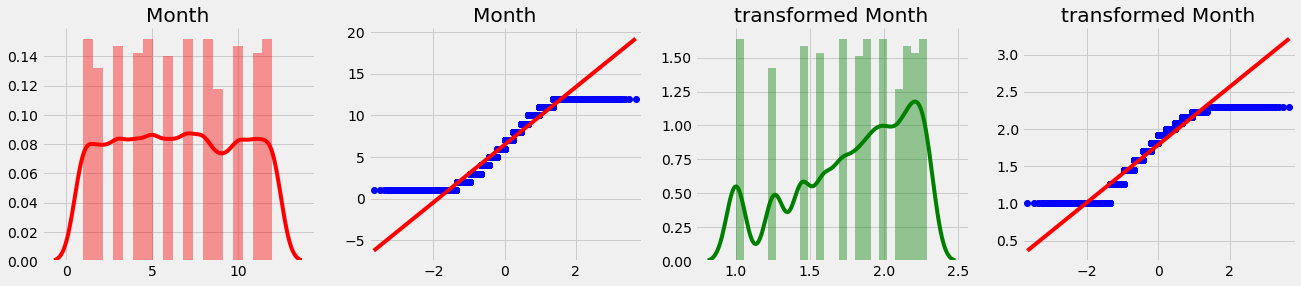

In [194]:
# Applying cube root transformation
transformation(features,np.cbrt)

##Conclusions:

#### All the transformation we applied has more or less similar behaviour.It is clear from the visualization that only feature 'Rented Bike Count' and 'Wind speed' shows a change in the distribution.That's why i will apply square root transformation on mentioned two features.

In [195]:
# Applying square root transformation on wind speed.
x['Wind speed (m/s)'] = np.sqrt(x['Wind speed (m/s)'])

In [196]:
# Applying square root transformation on 'Rented Bike Count'
y = np.sqrt(y)

##OUTLIER TREATMENT

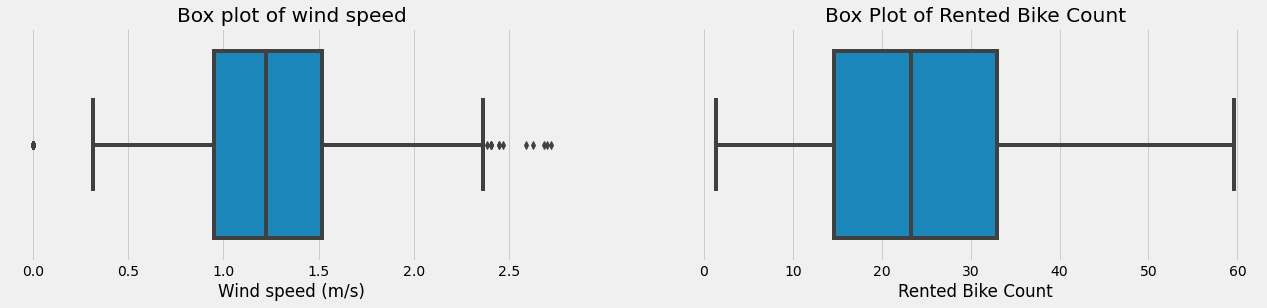

In [223]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (20,4))
# Plotting boxplot for "Wind Speed"
sns.boxplot(x['Wind speed (m/s)'],ax = axes[0]).set_title('Box plot of wind speed')
# Plotting boxplot for "Rented Bike Count"
sns.boxplot(y,ax = axes[1]).set_title('Box Plot of Rented Bike Count');


##Conclusions

####1)There are no outliers present in "Rented Bike Count".
####2)There might be outlier present in "Wind Speed"

In [224]:
# Outliers detection code
percentile_25 = x['Wind speed (m/s)'].quantile(0.25)
percentile_75 = x['Wind speed (m/s)'].quantile(0.75)
IQR = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * IQR
lower_limit = percentile_25 - 1.5 * IQR


In [233]:
# Checking number of datapoints which are outliers
x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)].shape[0]

84

In [231]:
# Stastical analysis of "Wind Speed" 
x['Wind speed (m/s)'].describe().to_frame()

Wind speed (m/s)
count       8465.000000
mean           1.250323
std            0.403231
min            0.000000
25%            0.948683
50%            1.224745
75%            1.516575
max            2.720294

In [235]:
# Checking datapoints which are outliers
outlier_df = x[(x['Wind speed (m/s)'] > upper_limit) | (x['Wind speed (m/s)'] < lower_limit)]
outlier_df.sample(5)

Hour  Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/m2)  \
3138    18             19.7          2.683282                     0.20   
8312     8              3.3          0.000000                     0.06   
5141     5             22.6          0.000000                     0.00   
8309     5              4.0          0.000000                     0.00   
7937    17              9.5          2.387467                     0.45   

      Rainfall(mm)  Snowfall (cm)  Day  Month  Seasons_Spring  Seasons_Summer  \
3138           0.0            0.0    4     10               1               0   
8312           0.0            0.0   11     12               0               0   
5141           0.0            0.0    7      3               0               1   
8309           0.0            0.0   11     12               0               0   
7937           0.0            0.0   27     10               0               0   

      Seasons_Winter  Holiday_No Holiday  
3138               0                   1  
8312               0                   1  
5141               0                   1  
8309               0                   1  
7937               0                   1

In [236]:
# Checking unique value present in "Wind Speed"
outlier_df['Wind speed (m/s)'].unique()

array([2.40831892, 0.        , 2.58843582, 2.44948974, 2.7202941 ,
       2.68328157, 2.46981781, 2.70185122, 2.62678511, 2.38746728])

In [237]:
# Checking datapoints having 0 as "Wind Speed"
outlier_df[outlier_df['Wind speed (m/s)'] == 0.].shape[0]

71

###Out of 84 outliers data point 71 data point are having 0 wind speed.So what's is the significance of 0 wind speed?

0 Wind speed means air isn't moving at all, and if it isn't moving, it can't be going in a particular direction. Usually, in weather observations, a wind speed that rounds off to zero is reported as "Calm," and that way no direction is given. However, it is possible for wind speed to be very slight, say one third of a mile per hour.(Source - https://www.wral.com/weather/blogpost/1116592/)

###So according to above analysis I am not doing any outlier treatment on "Wind Speed" so keeping these data points as it is.

### 6. Data Scaling

In [197]:
# Importing library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Using StandardScaler



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [198]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [199]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [200]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [201]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [202]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [203]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [204]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [205]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [206]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [207]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [208]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [209]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [210]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***